# Matplotlib Overview Lecture

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [5]:
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

You'll also need to use this line to see plots in the notebook:

In [6]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns.

**The data we want to plot:**

In [7]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [8]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [9]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following.

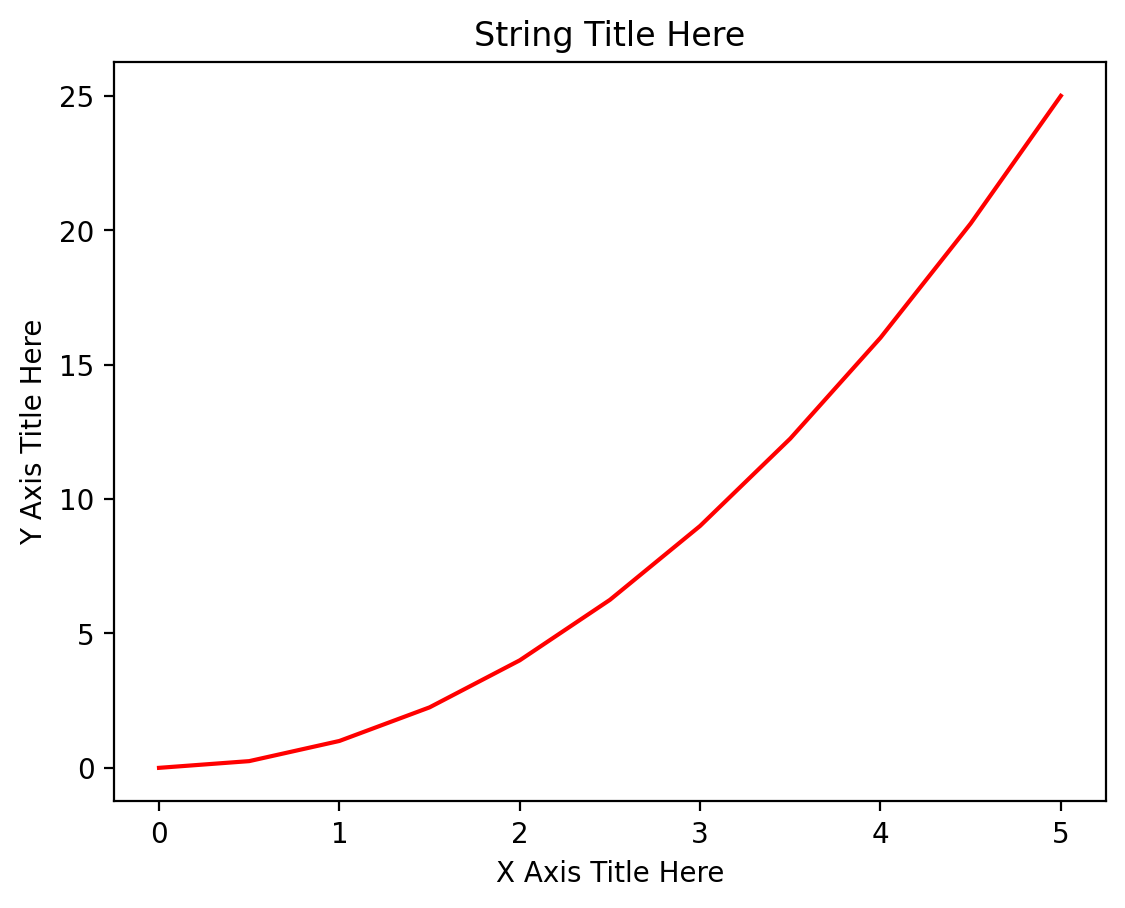

In [10]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Creating Multiplots on Same Canvas

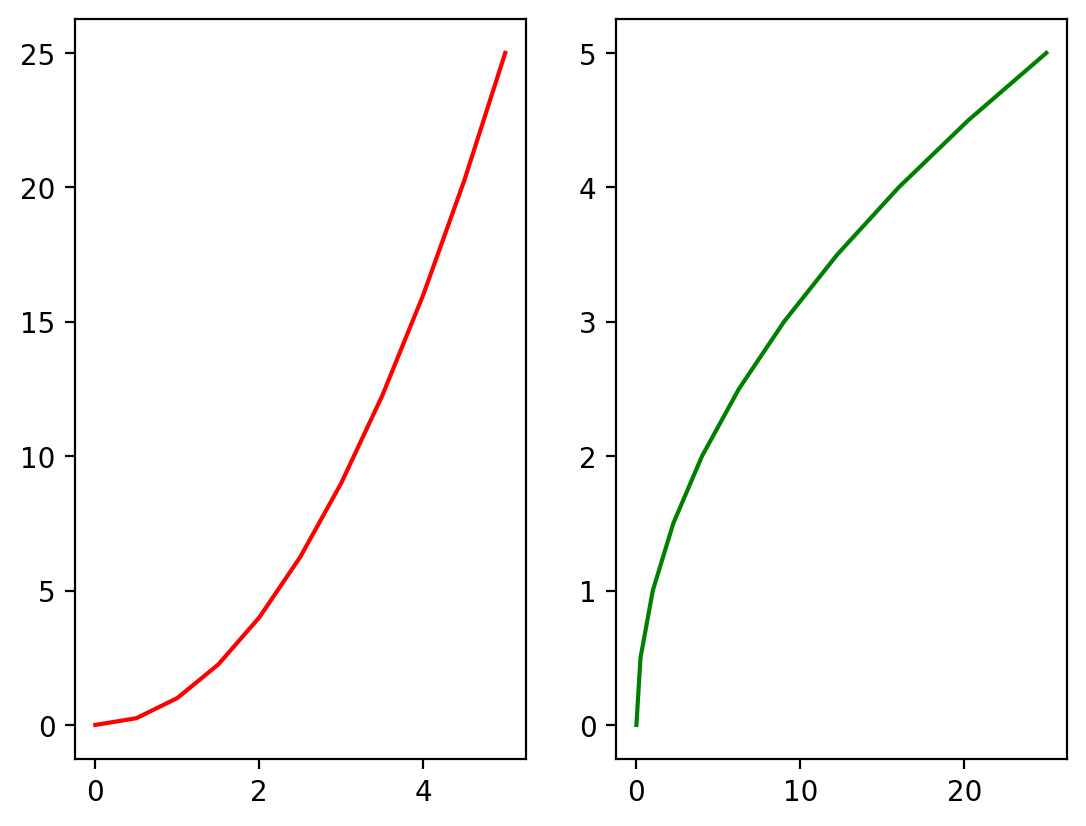

In [11]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g');

___
# Matplotlib Object Oriented Method


## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

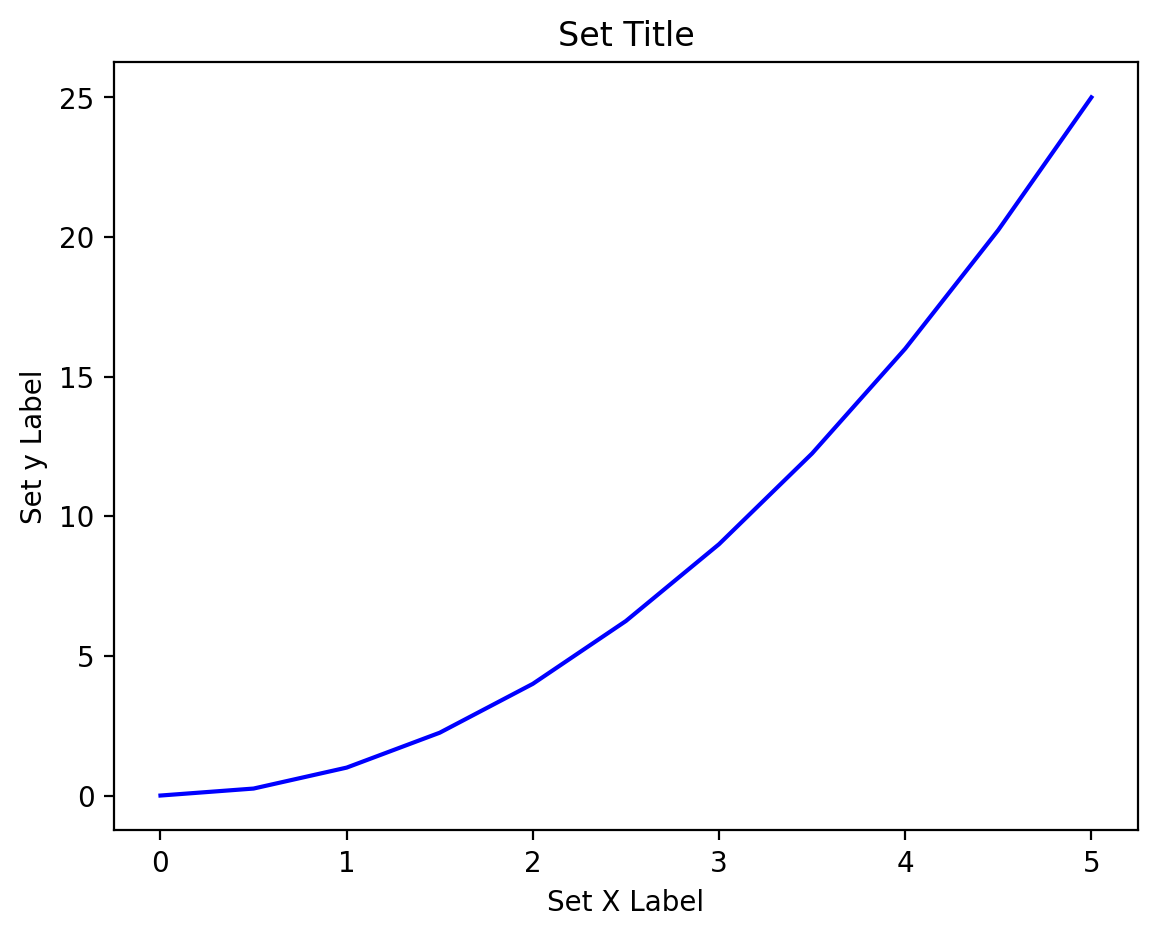

In [12]:
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

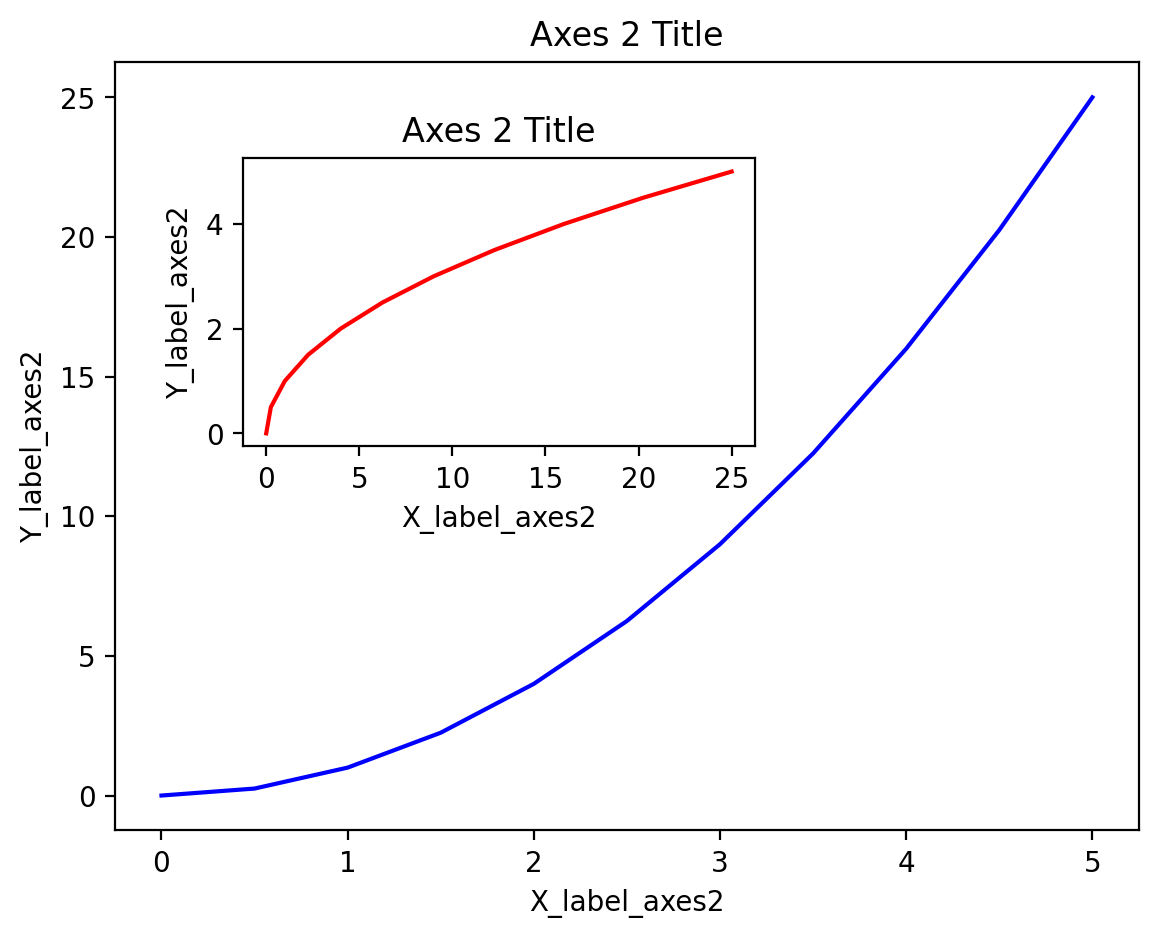

In [13]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

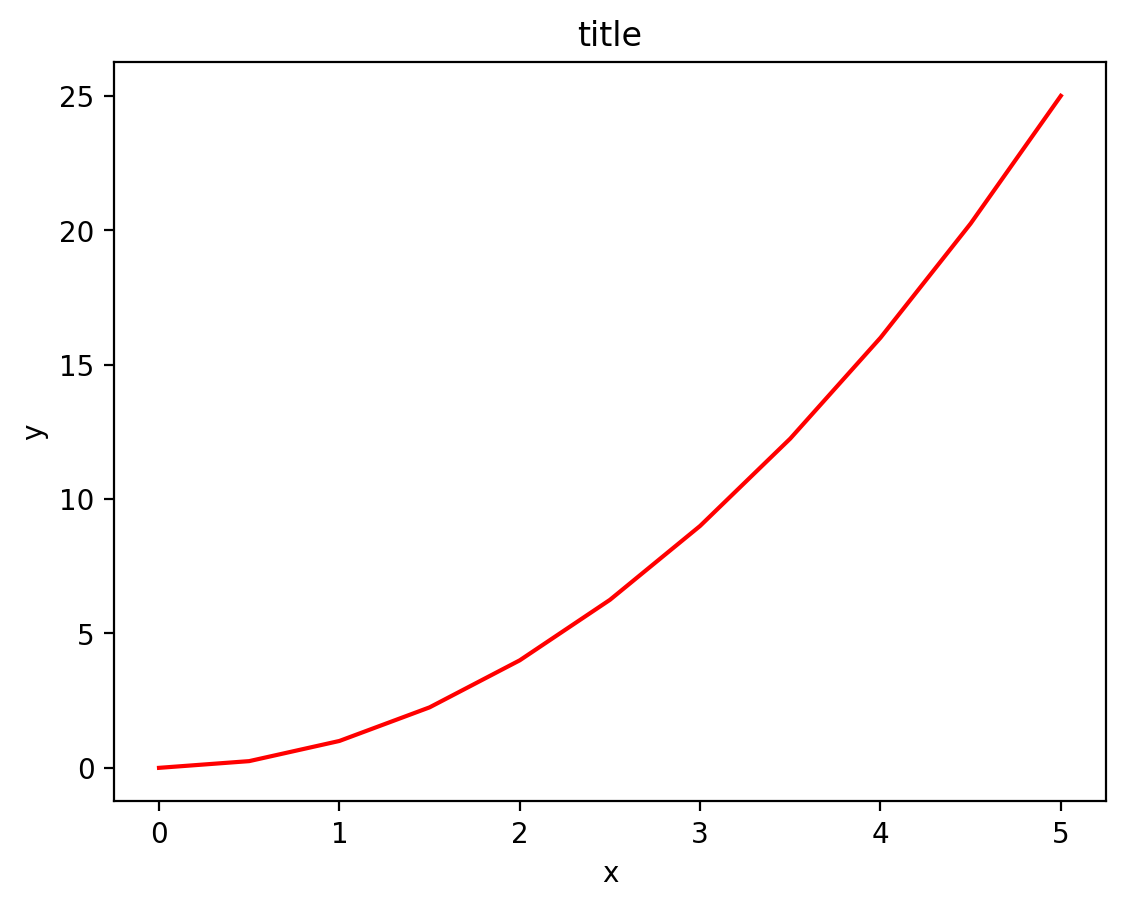

In [14]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

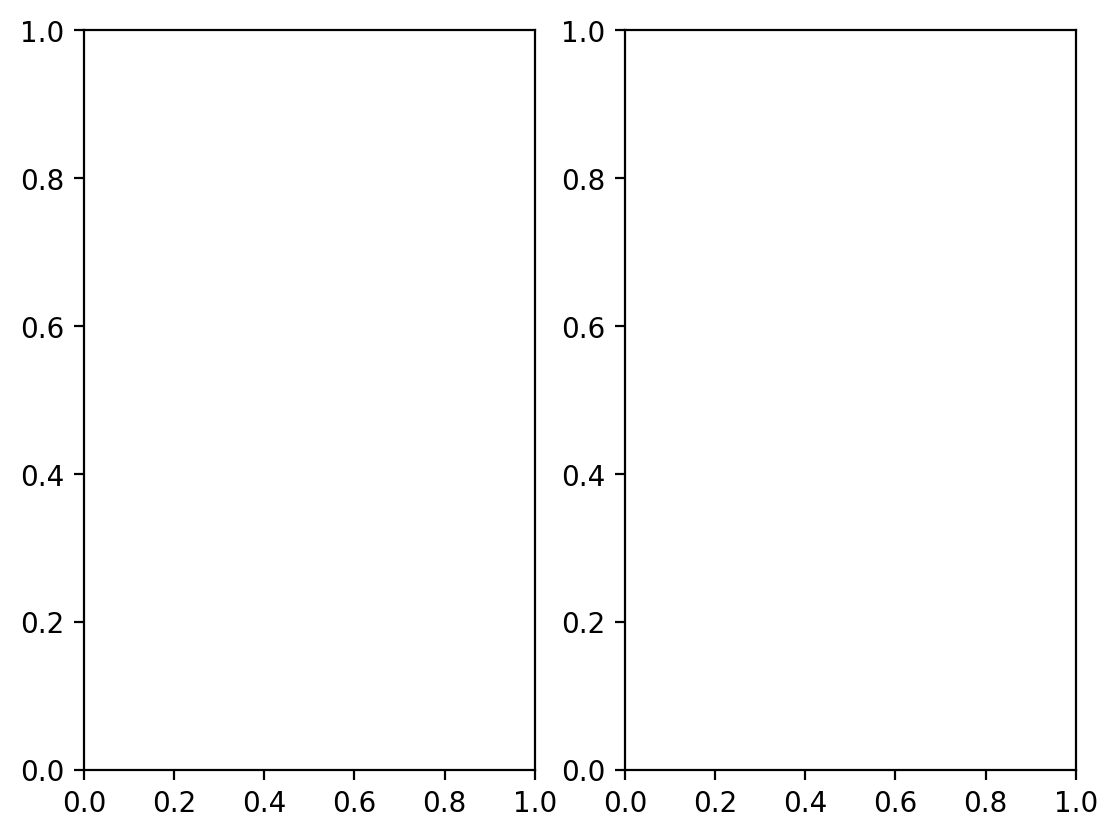

In [15]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [16]:
# Axes is an array of axes to plot on
axes

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

We can iterate through this array:

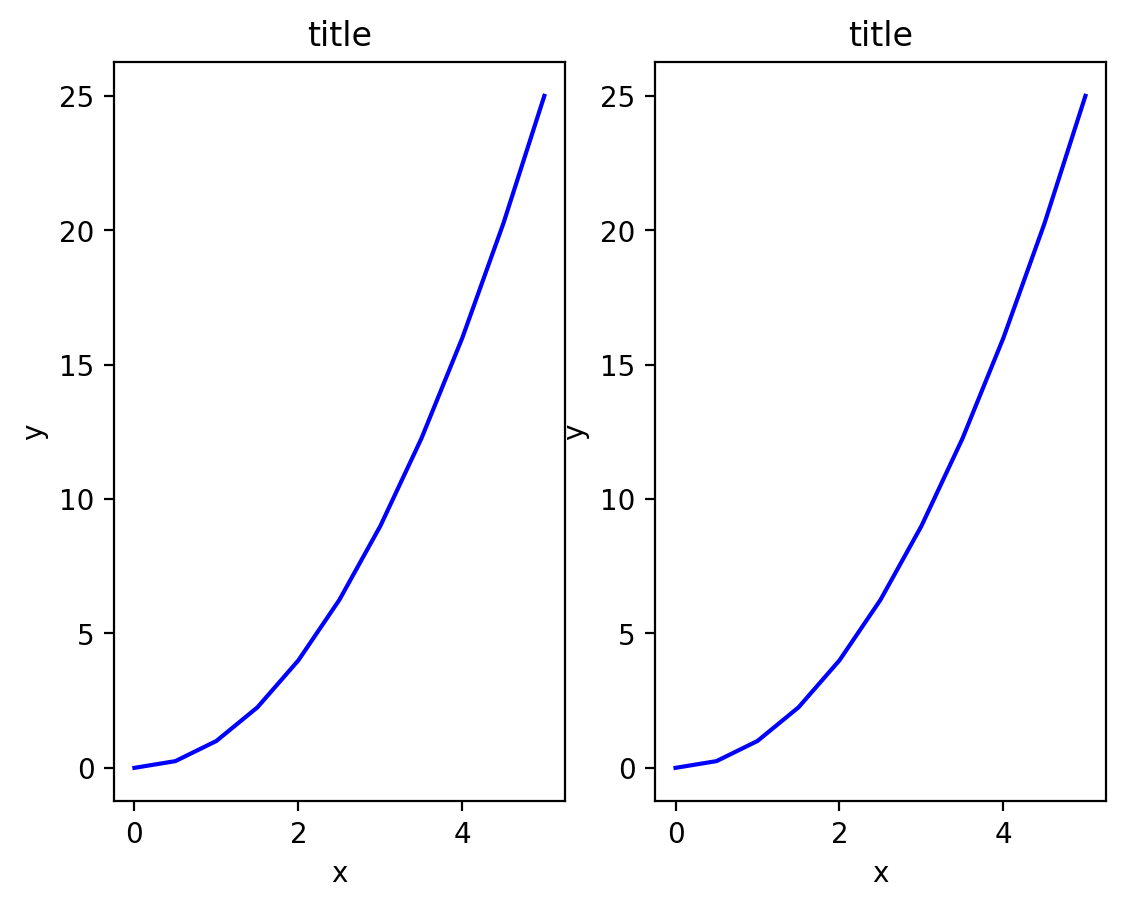

In [17]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We can use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

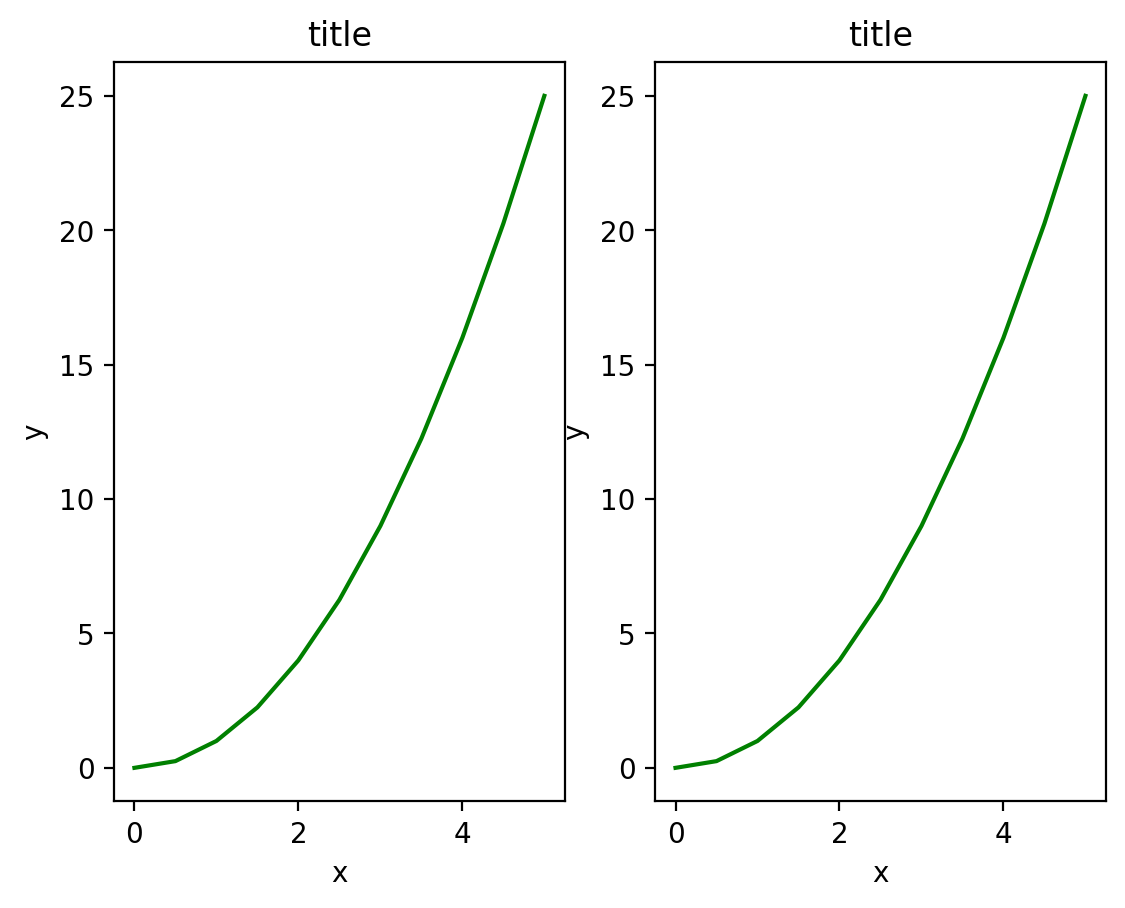

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)#sharex=True, sharey=True

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

#fig    
#plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

In [19]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

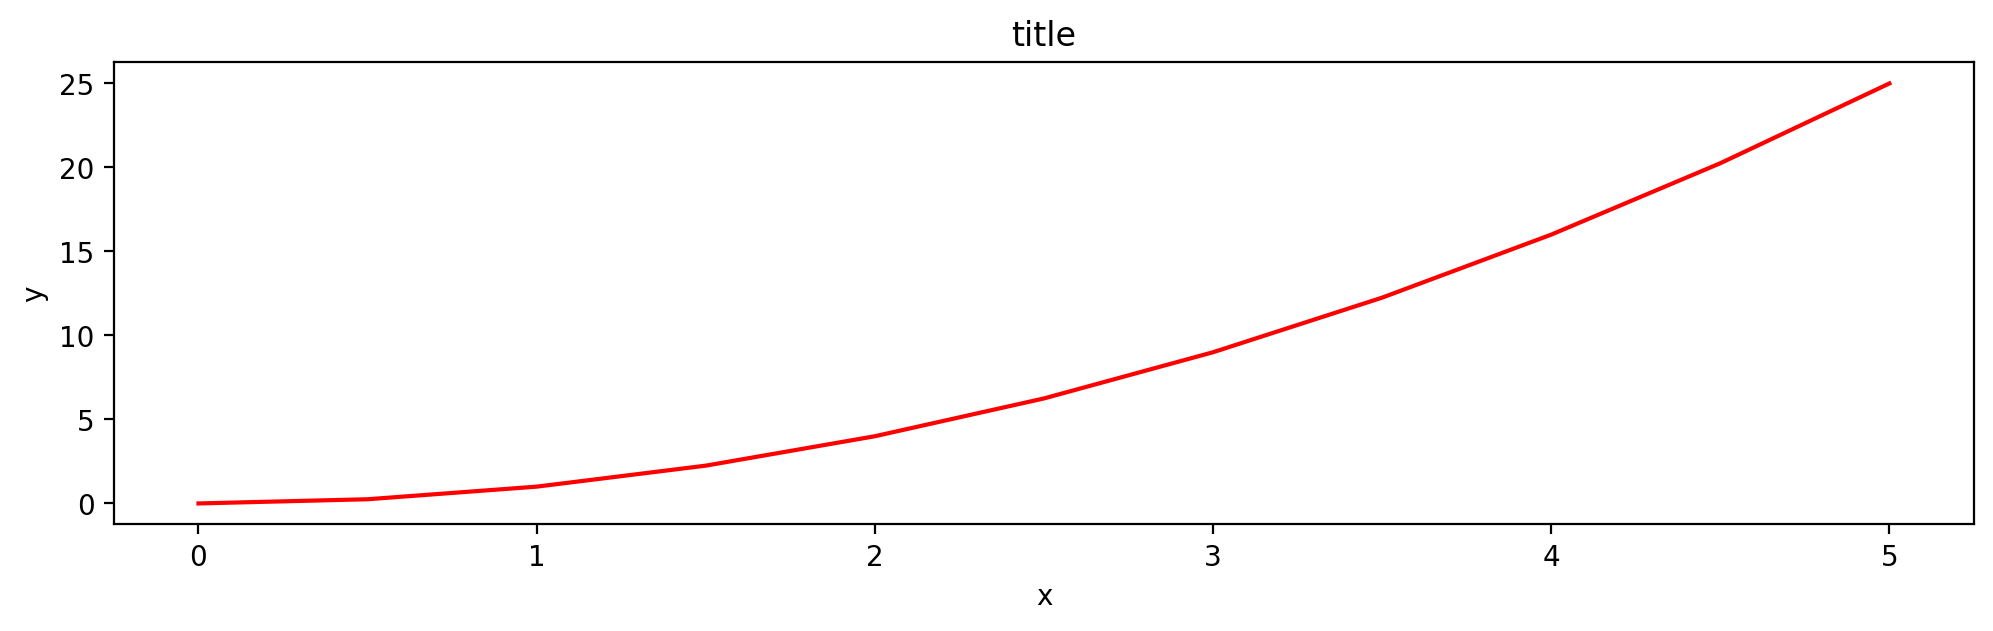

In [20]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [21]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [22]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [23]:
ax.set_title("title")

Text(0.5, 1.0, 'title')

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [24]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(589.090909090909, 0.5, 'y')

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

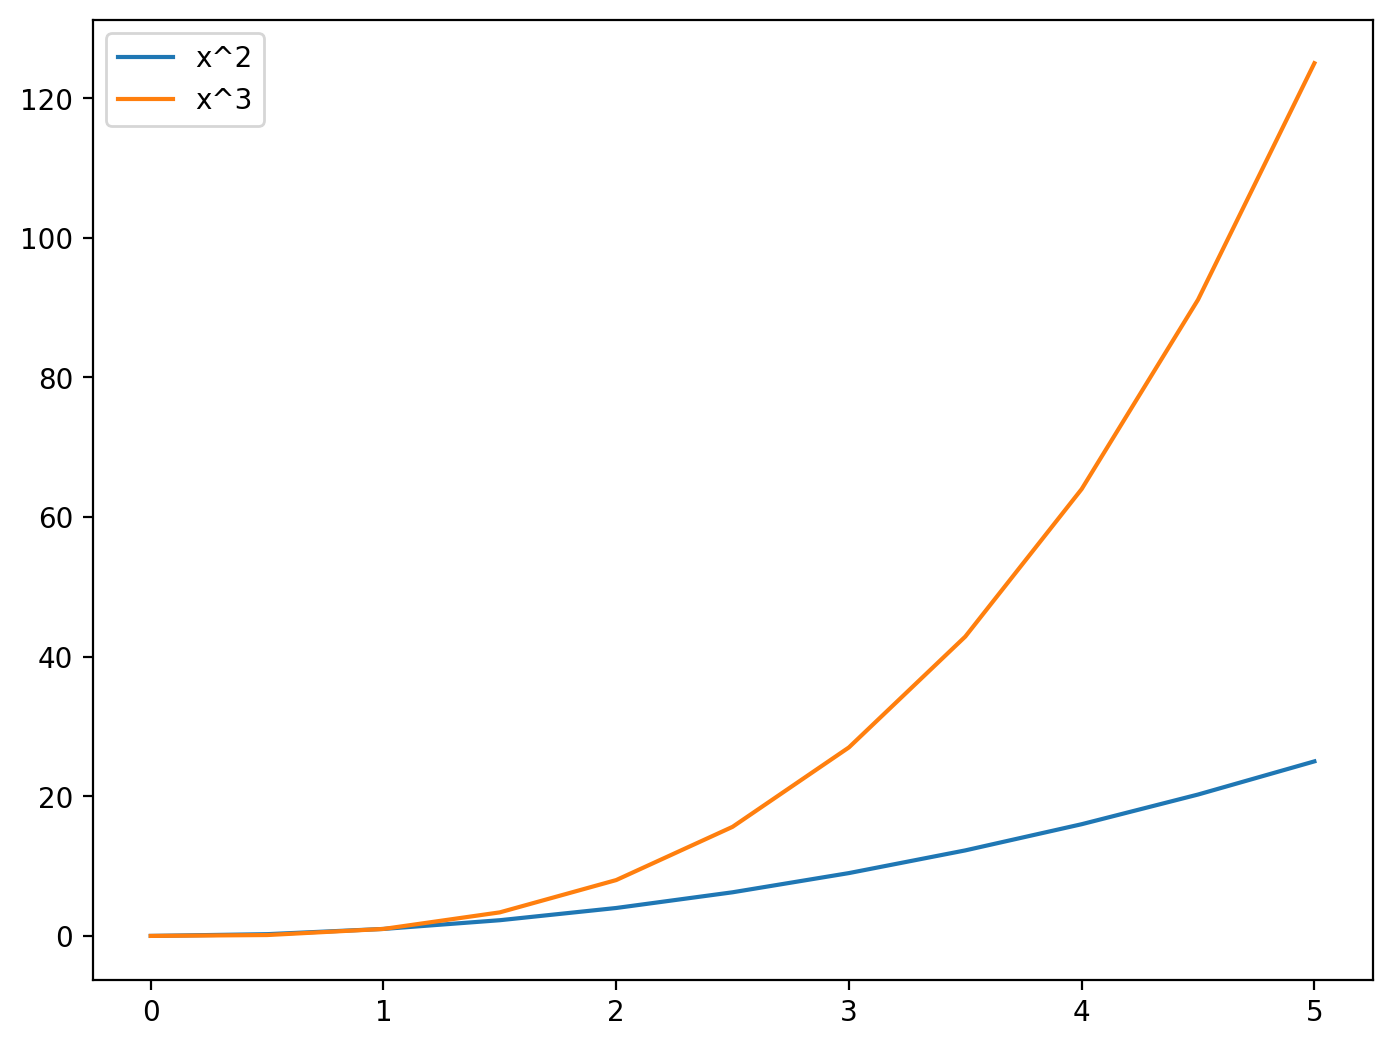

In [25]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x^2")
ax.plot(x, x**3, label="x^3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of [**loc**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) are numerical codes for the various places the legend can be drawn.

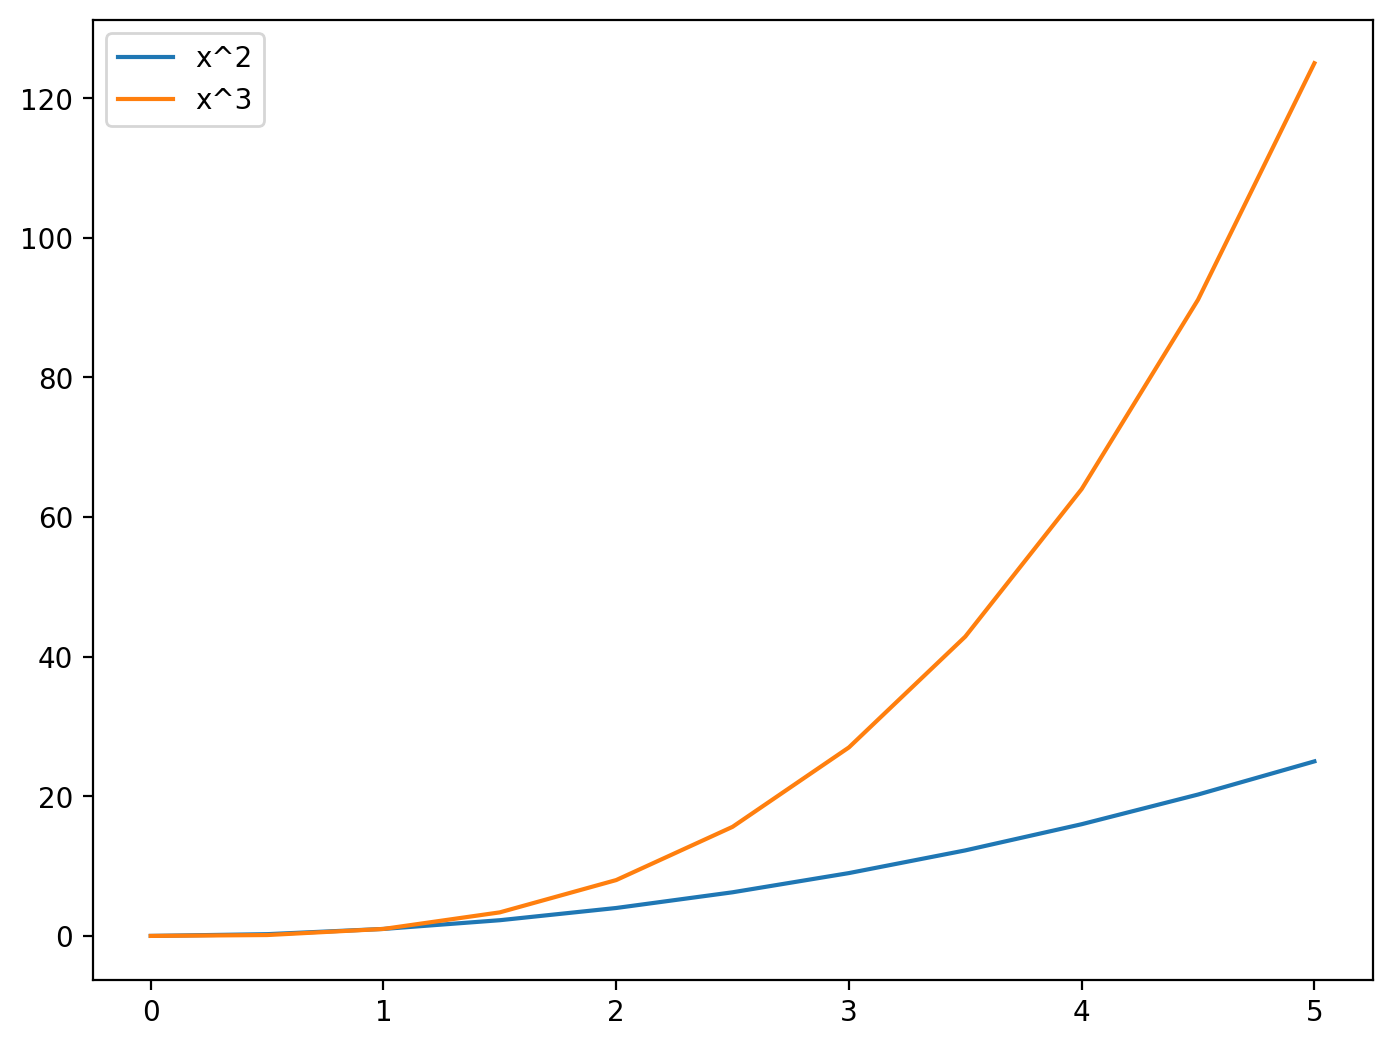

In [26]:
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner


ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 


### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:
- Default colors (b: blue, g: green, r: red, c: cyan, m: magenta, y: yellow, k: black, w: white)
- color="0.75" creates a 75% gray
- You can use hexcodes color="#eeefff"
- You can use [color names](https://en.wikipedia.org/wiki/Web_colors) found next like this color="burlywood"
- alpha defines the percentage of opacity

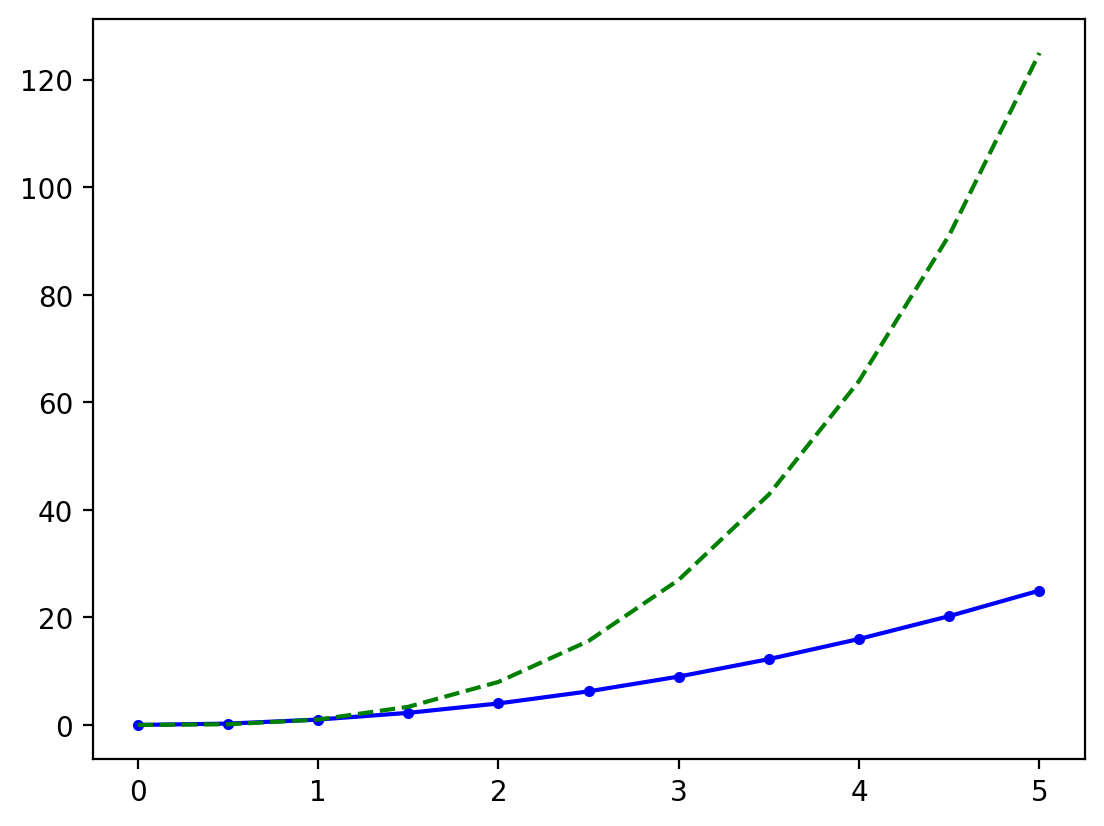

In [27]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

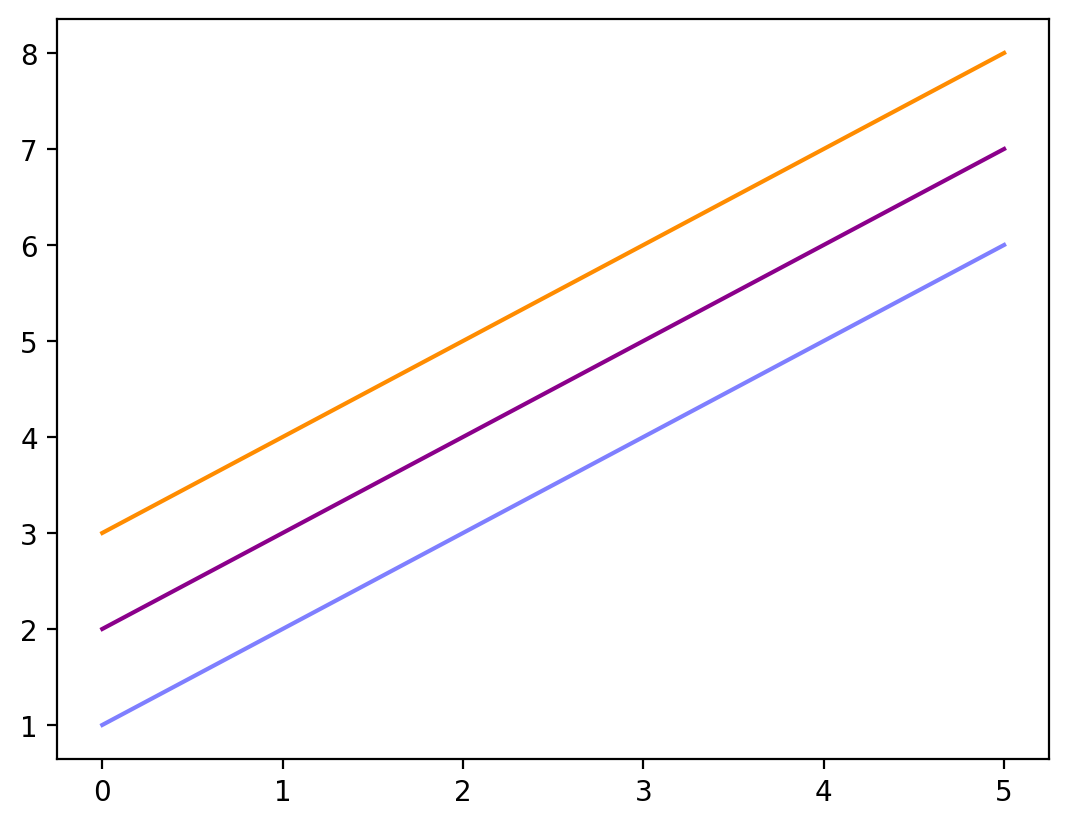

In [28]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

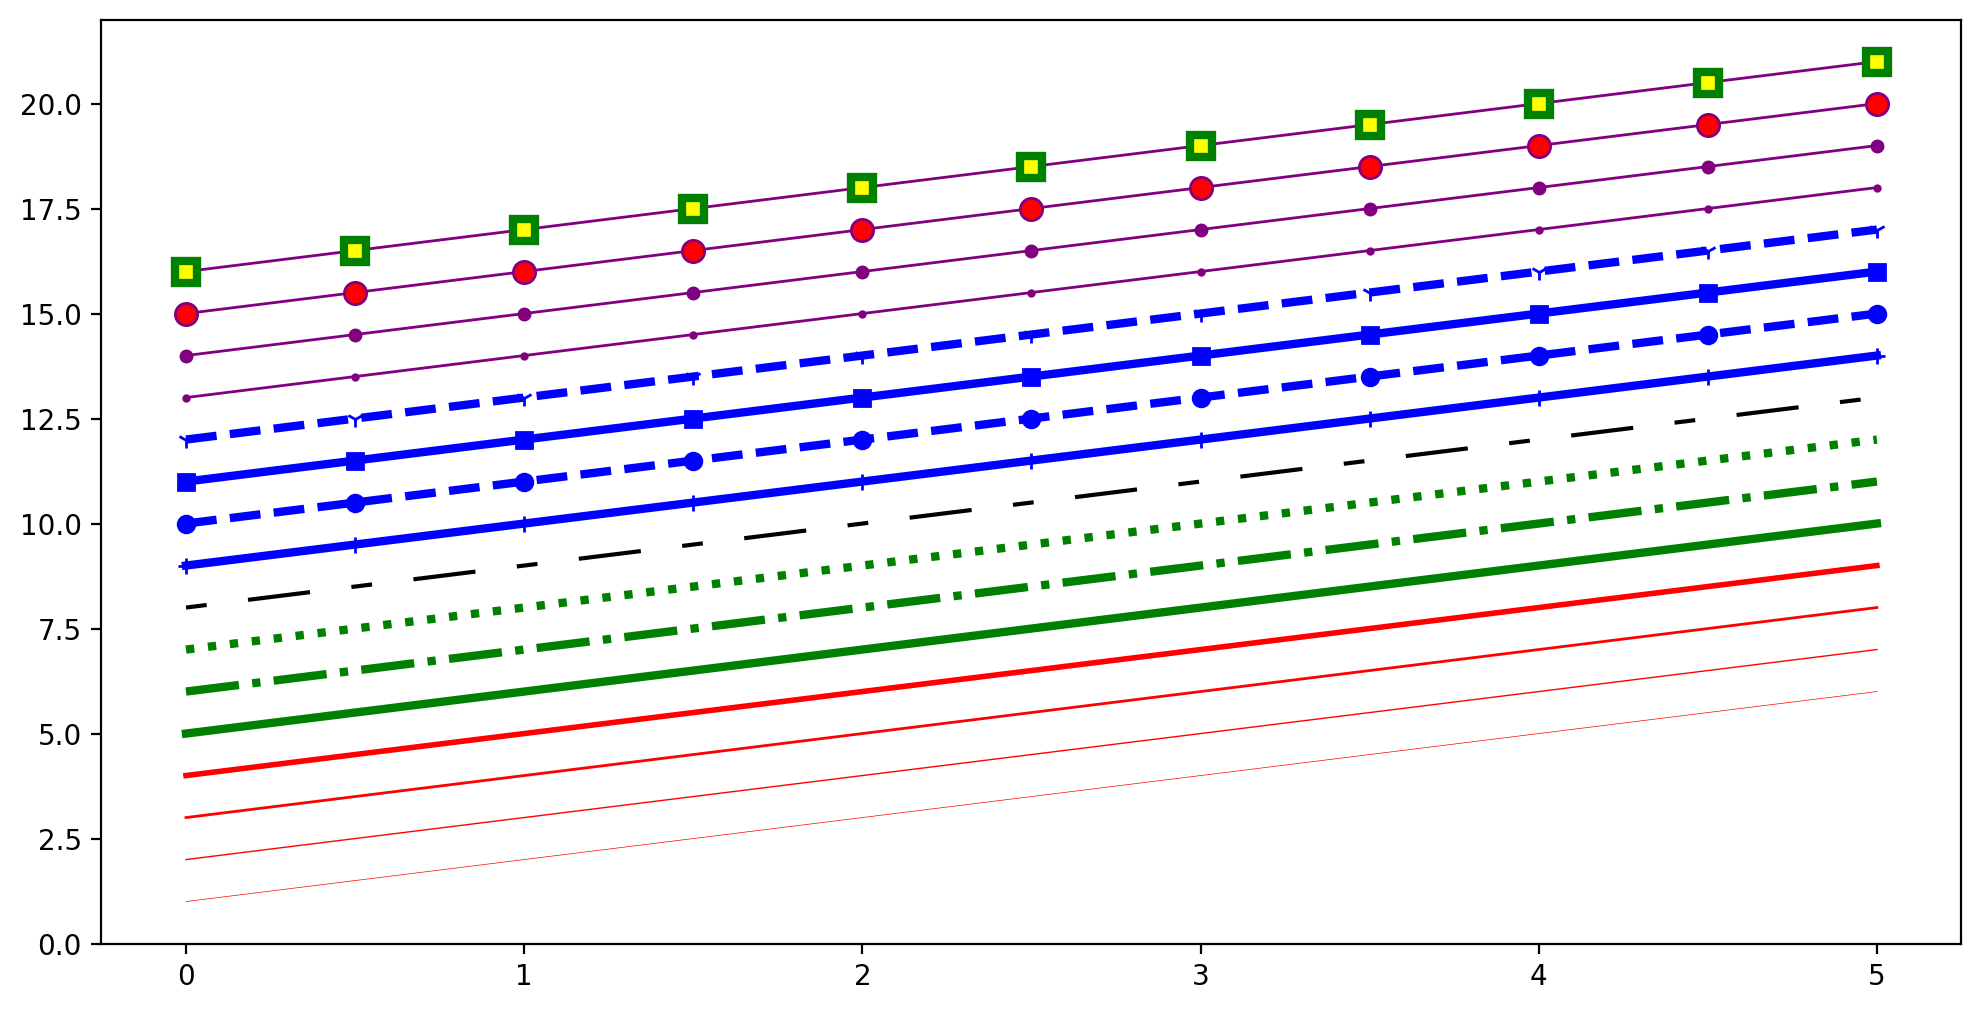

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

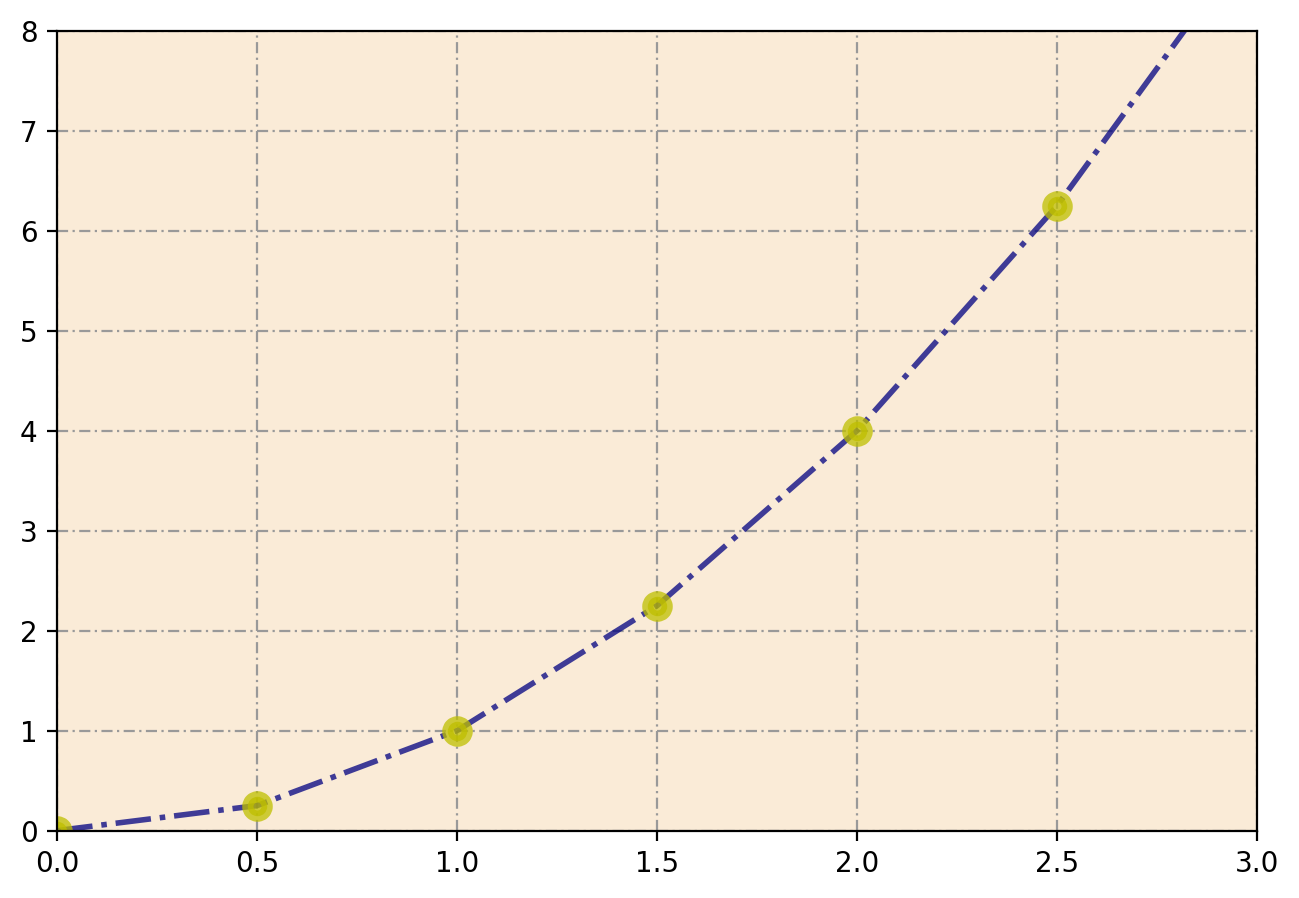

In [30]:
import pandas as pd
fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])

# https://matplotlib.org/3.3.0/api/markers_api.html
# You can change the markersize as well


axes_3.plot(x,y,color='navy', alpha=.75, lw=2, ls='-.',
           marker='o', markersize=7, markerfacecolor='y',
           markeredgecolor='y', markeredgewidth=4)

# Set the lower and upper bound of x & y axis
axes_3.set_xlim([0,3])
axes_3.set_ylim([0,8])

# Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
axes_3.grid(True, color='0.6', dashes=(5, 2, 1, 2))
axes_3.set_facecolor('#FAEBD7')

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

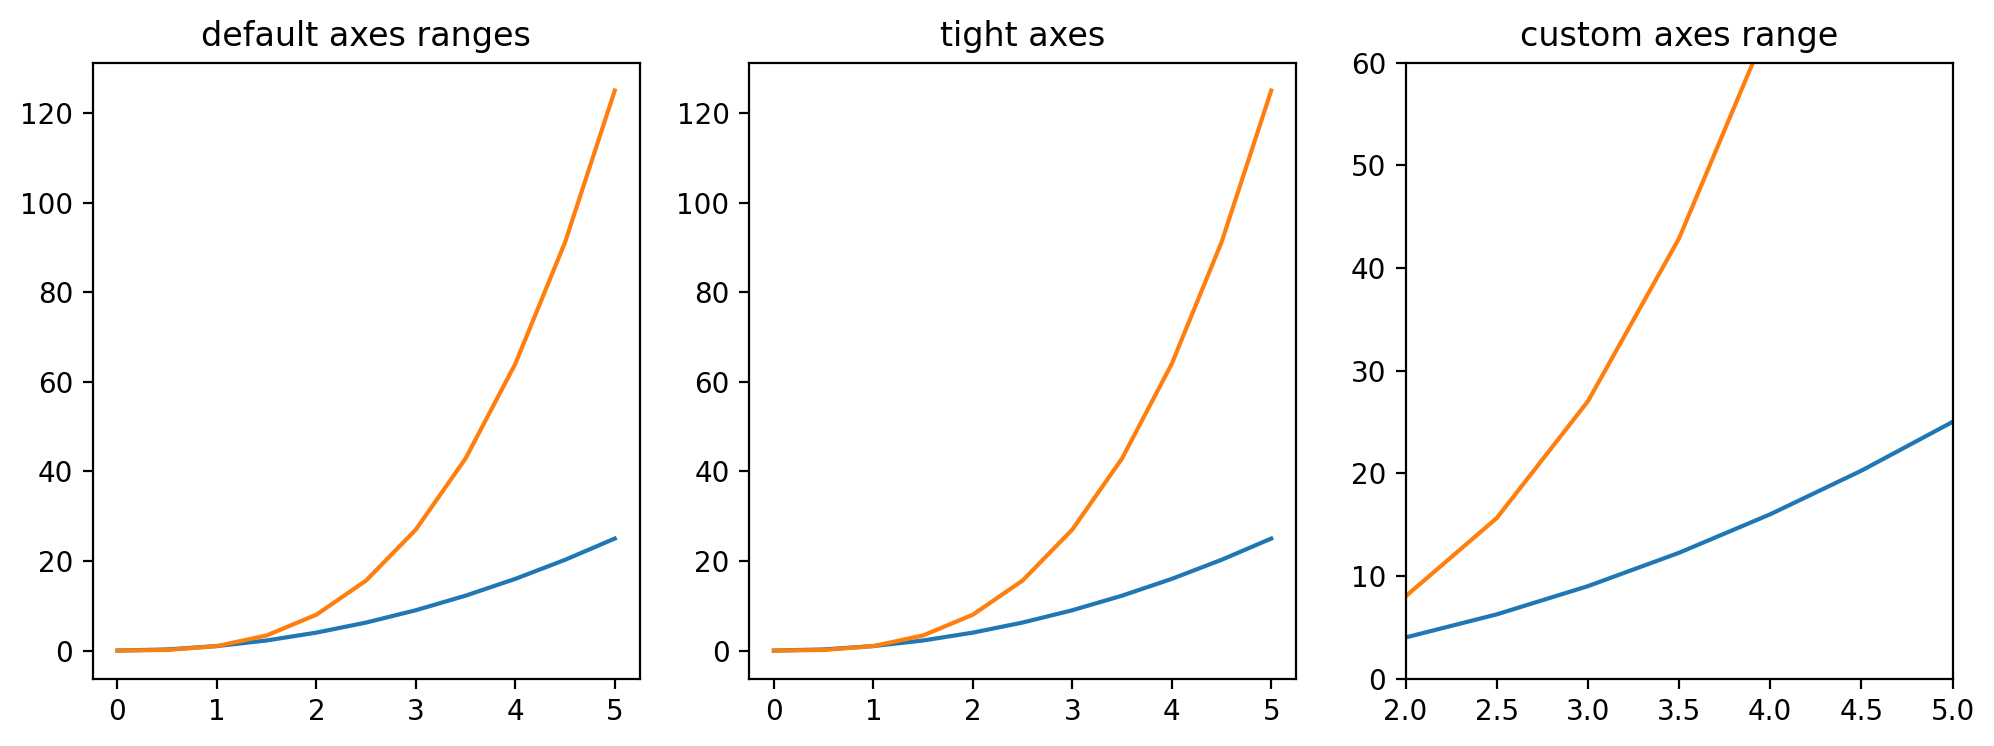

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

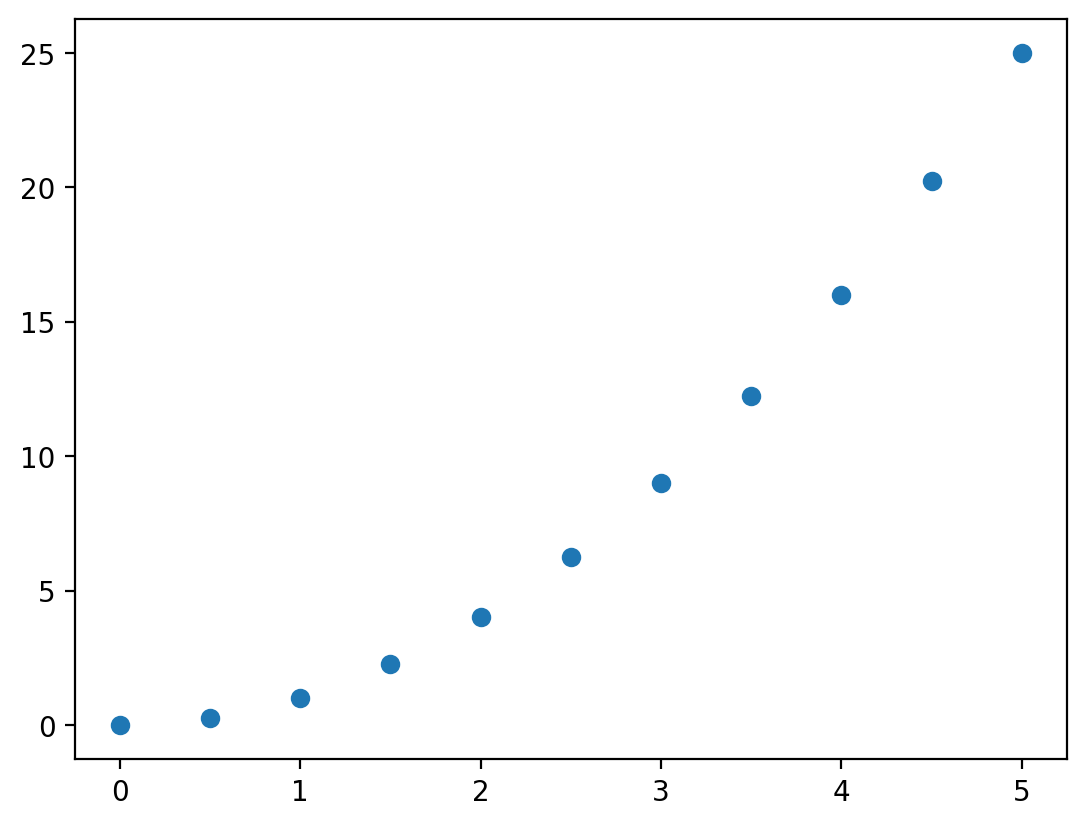

In [32]:
plt.scatter(x,y)

(array([10., 18., 19.,  6.,  8.,  6.,  6.,  7.,  9., 11.]),
 array([  5. , 103.1, 201.2, 299.3, 397.4, 495.5, 593.6, 691.7, 789.8,
        887.9, 986. ]),
 <BarContainer object of 10 artists>)

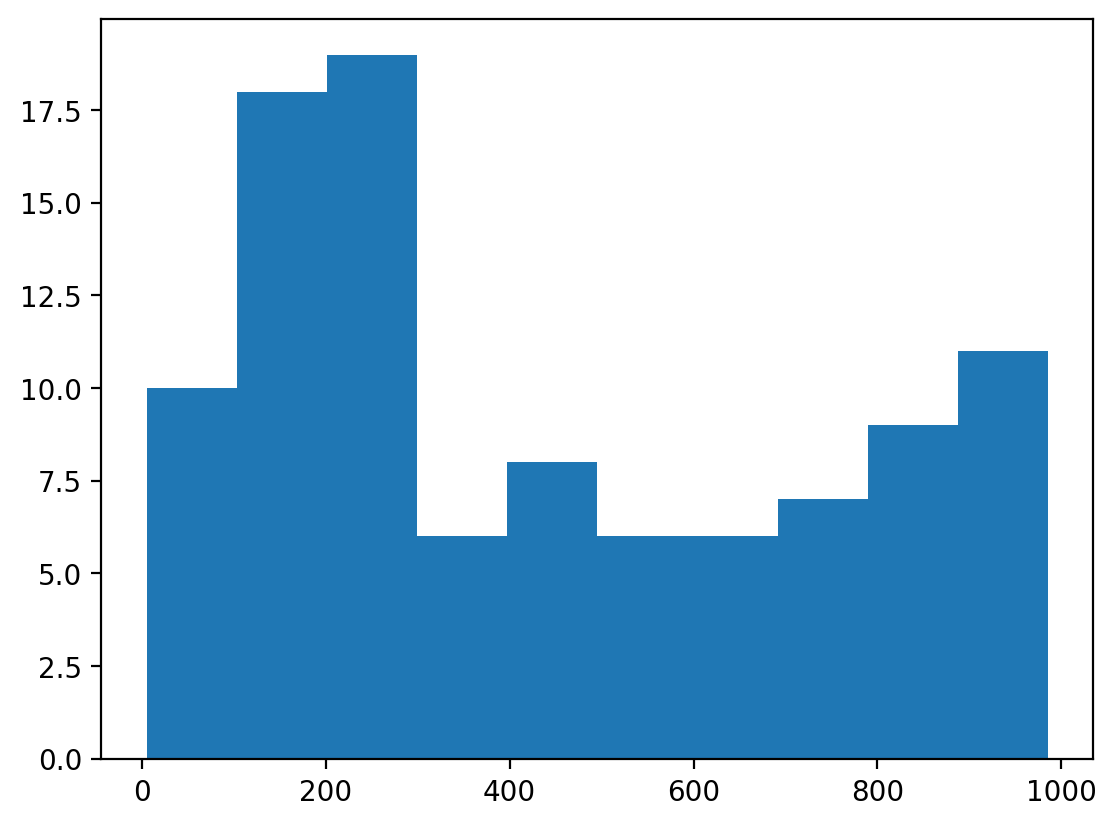

In [33]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

(array([0.02904, 0.06578, 0.0957 , 0.12672, 0.15928, 0.1771 , 0.15114,
        0.12078, 0.0847 , 0.05918, 0.03058]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

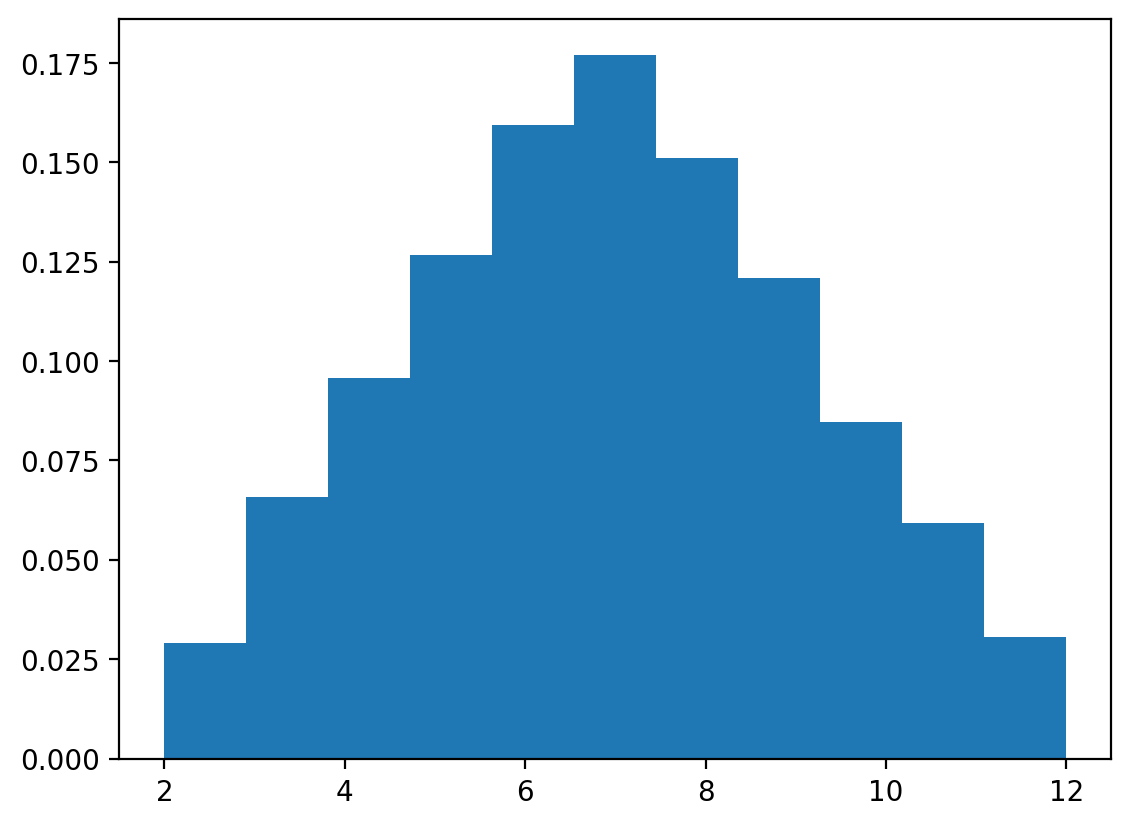

In [34]:
arr_1 = np.random.randint(1,7,5000)
arr_2 = np.random.randint(1,7,5000)
arr_3 = arr_1 + arr_2
# Bins reprsent the number of options available 2 thru 12 = 11
# Density returns the frequency of each bin
# cumulative=True use a cumulative distribution
# histtype='step' genrates a line plot
# orientation='horizontal' 
# color='orange' change bar color
plt.hist(arr_3, bins=11, density=True)

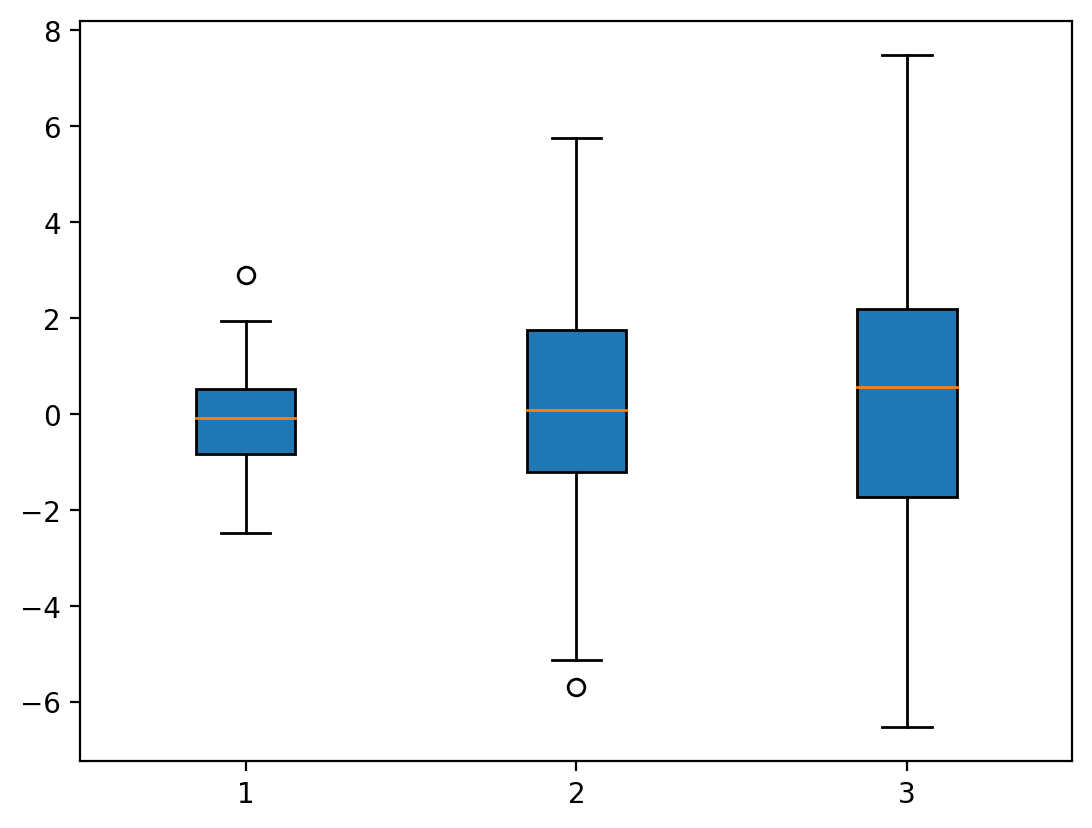

In [35]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

Text(60, 520, 'Good Month')

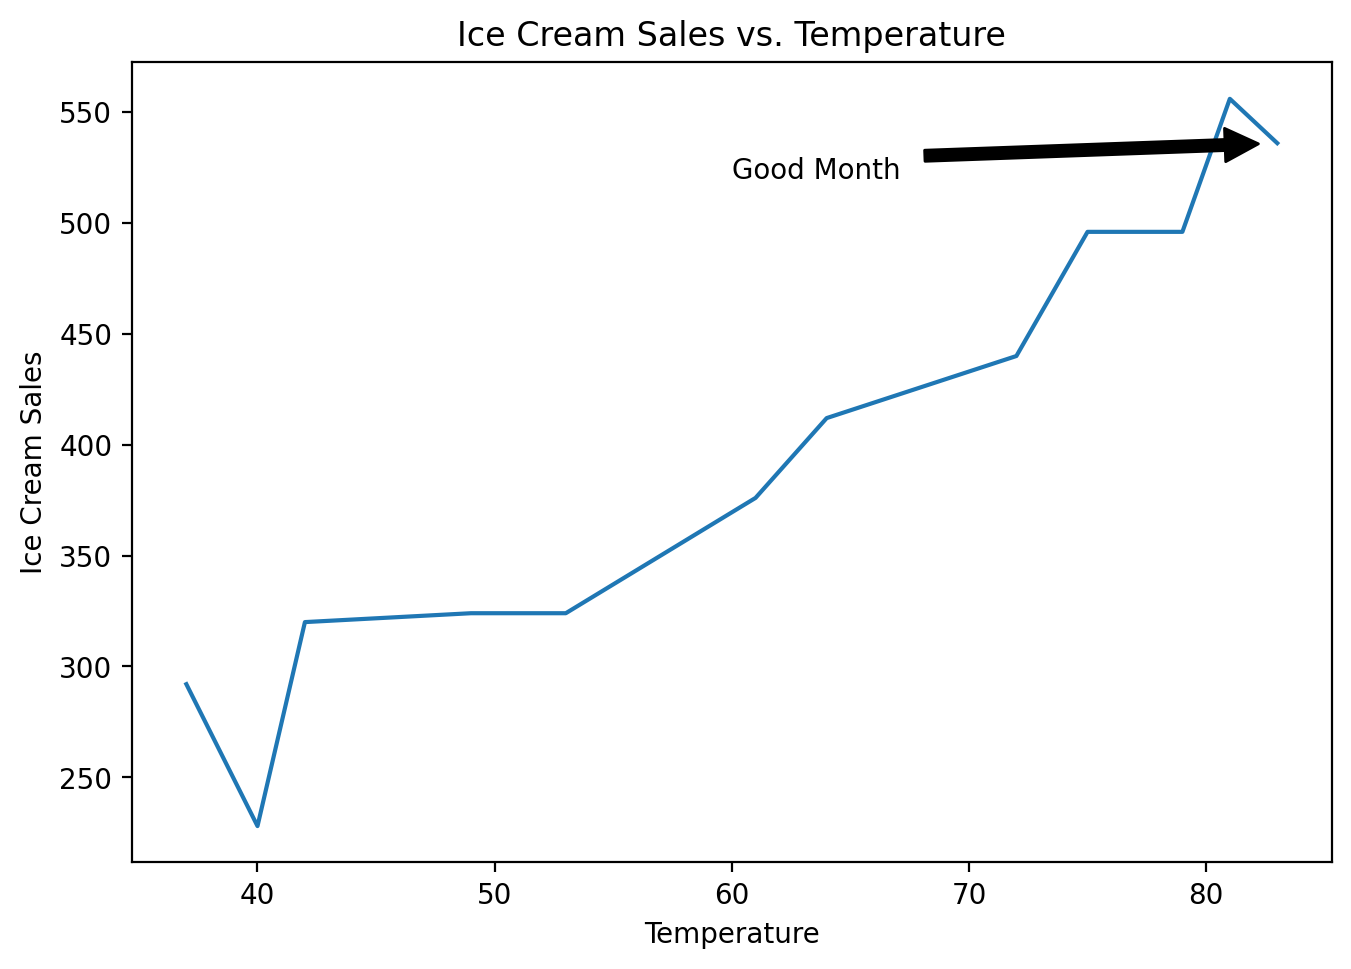

In [38]:
import pandas as pd

ics_df = pd.read_csv('icecreamsales.csv')
ics_df = ics_df.sort_values(by='Temperature')

# Convert from Pandas to NumPy array
np_arr = ics_df.values

# Get x & y values and put in array
x_2 = np_arr[:,0]
y_2 = np_arr[:,1]

fig_4 = plt.figure(figsize=(6,4))
axes_4 = fig_4.add_axes([0,0,1,1])
axes_4.set_title('Ice Cream Sales vs. Temperature')
axes_4.set_xlabel('Temperature')
axes_4.set_ylabel('Ice Cream Sales')
axes_4.plot(x_2,y_2)

# Add Annotations by supplying the x & y to point at and the position of the text
# based off of lower left had corner being 0,0
axes_4.annotate('Good Month', xy=(83, 536), xytext=(60, 520), arrowprops=dict(facecolor='black', shrink=0.05),)

# Add bars to the plot
#plt.bar(x_2,y_2)

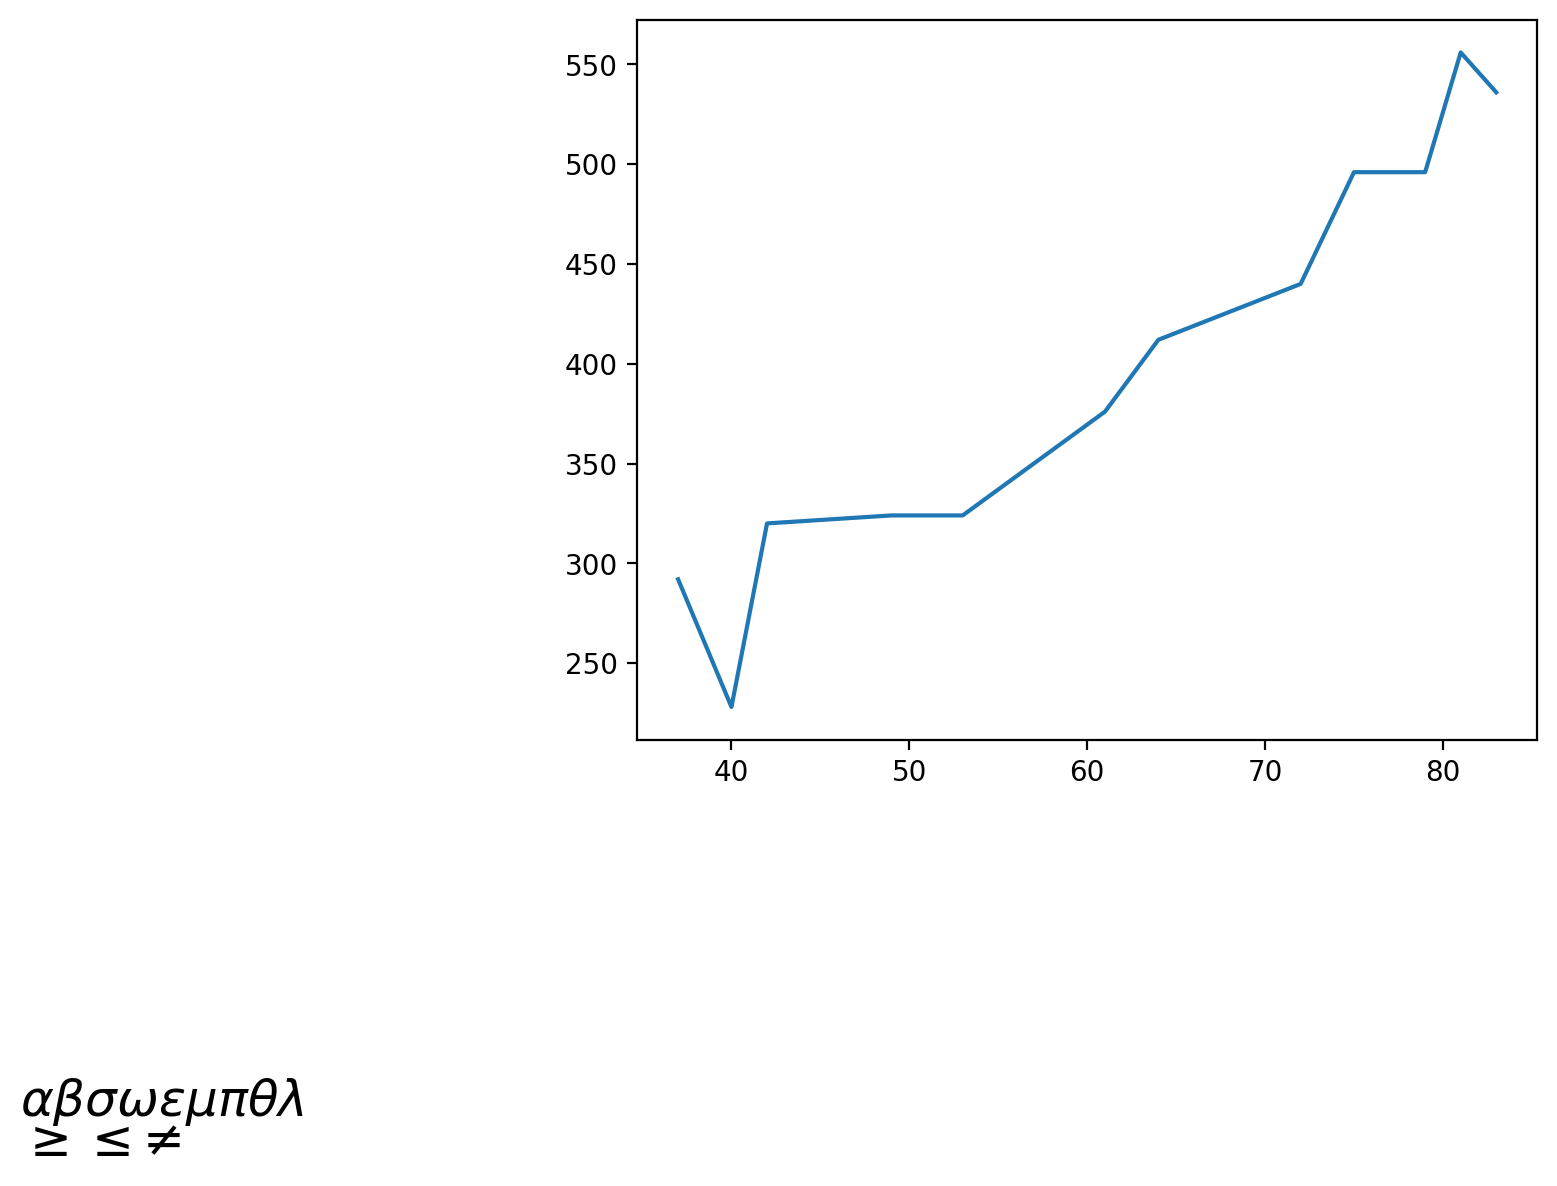

In [42]:
# You can use a subset of TeX markup by placing text between $
# matplotlib.org/tutorials/text/mathtext.html
fig_5 = plt.figure(figsize=(5,4),dpi=100)
axes_5 = fig_5.add_axes([0.1,0.1,0.9,0.9])

# All listed plus kappa, iota, zeta, nu, rho, eta, xi, omicron, gamma, tau, phi, 
# chi, psi, delta (Capitalize the first letter for uppercase)
axes_5.text(0, 23, r'$\alpha \beta \sigma \omega \epsilon \mu \pi \theta \lambda$', fontsize=18)
# # Subscripts, multiletter superscript, sum, fractions, binomial
# axes_5.text(0, 18, r'$\delta_i \gamma^{ij} \sum_{i=0}^\infty x_i \frac{3}{4} \binom{3}{4}$', fontsize=18)
# # Another fraction, sqrt, cbrt, trig functions : 
# axes_5.text(0, 13, r'$\frac{8 - \frac{x}{5}}{8} \sqrt{9} \sin(\pi) \sqrt[3]{8} \acute a \div$', fontsize=18)
# axes_5.text(0, 8, r'$\bar a \hat a \tilde a \vec a \overline {a} \lim_{x \to 2} f(x) = 5$', fontsize=18)
axes_5.text(0, 3, r'$\geq \leq \ne$', fontsize=18)
axes_5.plot(x_2,y_2)

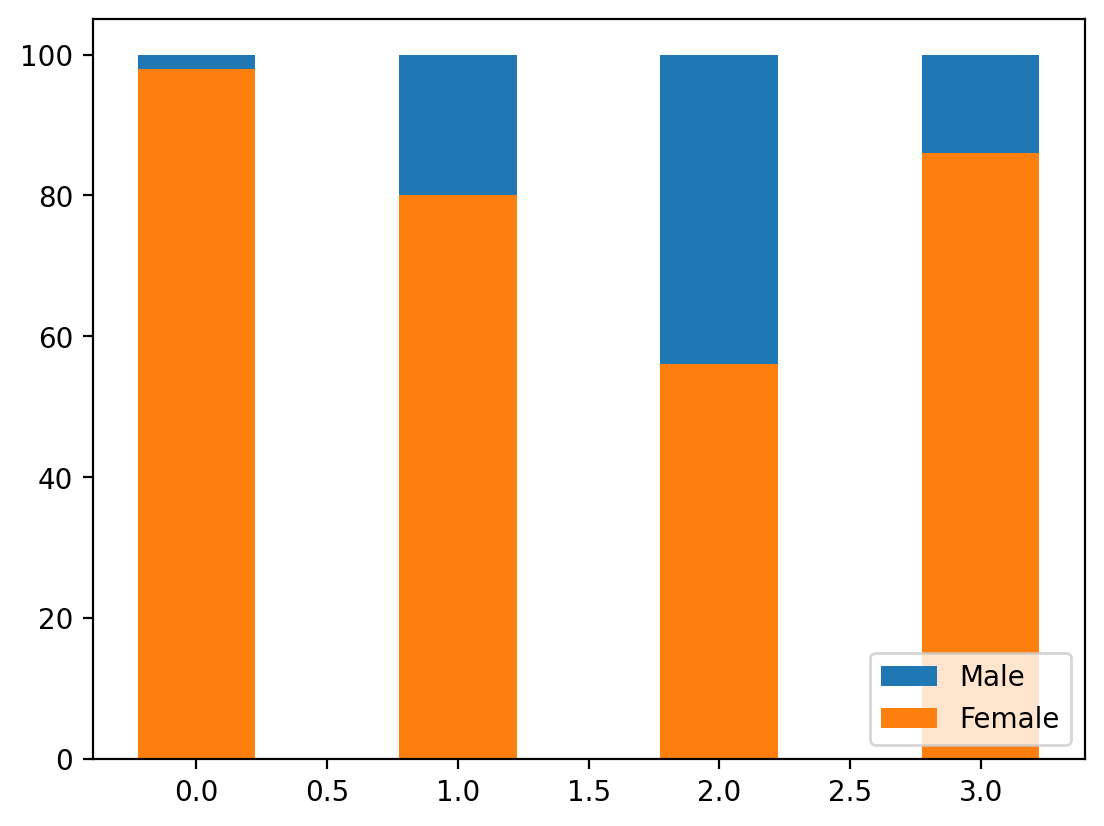

In [43]:
# Analyze where France gets its electricity from
x = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
per_1 = [71, 10, 3, 7, 2, 4, 3]
# Chart variance in usage
variance = [8, 3, 1, 3, 1, 2, 1]
# barh makes horizontal chart
# Also yerr, change error color with ecolor
# plt.bar(x, per_1, color='purple', yerr=variance)

# Show percentages of males & females in engineering
m_eng = (76, 85, 86, 88, 93)
f_eng = (24, 15, 14, 12, 7)

# Get evenly spaced values for each interval
spc = np.arange(5)

# Plot bars for men & women
# Can also add yerr, xerr, 
# plt.bar(spc, m_eng, width=0.45, label='Male', edgecolor='k')
# plt.bar(spc + 0.45, f_eng, width=0.45, label='Female', edgecolor='k')

# Define x tick names and place in middle of bars
# plt.xticks(spc + 0.45 / 2, ('Aero', 'Chem', 'Civil', 'Elec', 'Mech'))

# Plot teachers by sex
t_type = ['Kind', 'Elem', 'Sec', 'Spec']
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 80, 56, 86])
ind = [x for x, _ in enumerate(t_type)]

# Plot stacked bars for men and then women under
plt.bar(ind, m_teach, width=0.45, label='Male', bottom=f_teach)
plt.bar(ind, f_teach, width=0.45, label='Female')

plt.legend(loc='lower right')

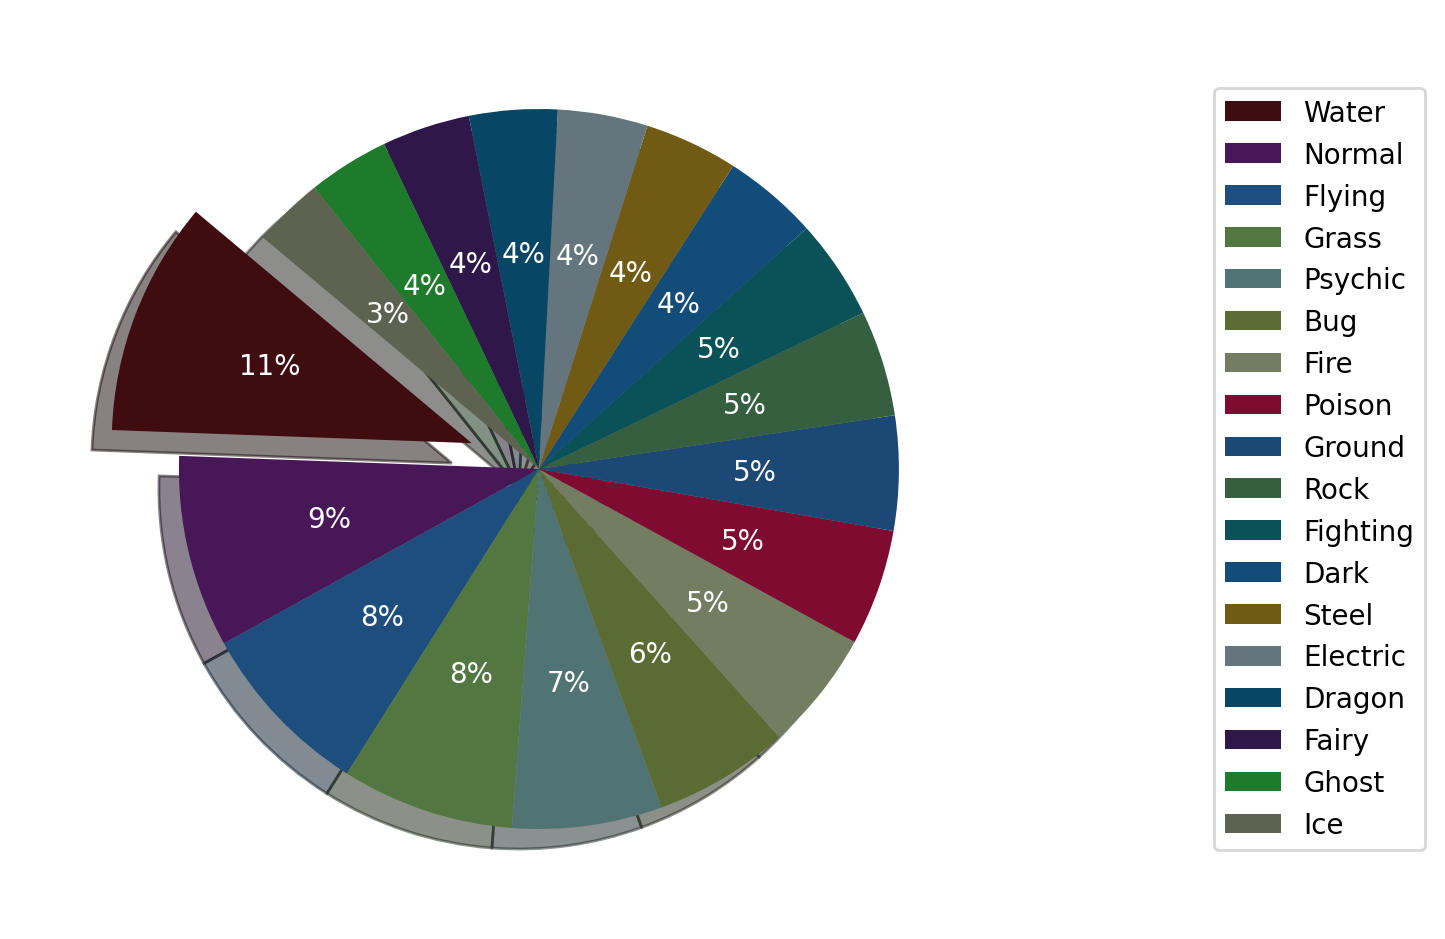

In [44]:
import random

fig_6 = plt.figure(figsize=(8,5),dpi=100)
axes_6 = fig_6.add_axes([0.1,0.1,0.9,0.9])

# Create a pie chart of the number of Pokemon by type
types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fairy',
'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

# Generate a random color array (Use lower values to make darkb)
colors = []
for i in range(18):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)
    
# Explode biggest 1st slice
explode = [0] * 18
explode[0] = 0.2

# Provide values, what to explode and by how much, labels, colors, pct for values,
# whether to shadow, amount to rotate pie, pie text color
wedges, texts, autotexts = plt.pie(poke_num, explode=explode, labels=types, colors=colors, 
                                   autopct='%1.0f%%', shadow=True, startangle=140, 
                                   textprops=dict(color="w"))
# Create legend to right and move off pie with 1-1.5 axes point width
plt.legend(wedges, types, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

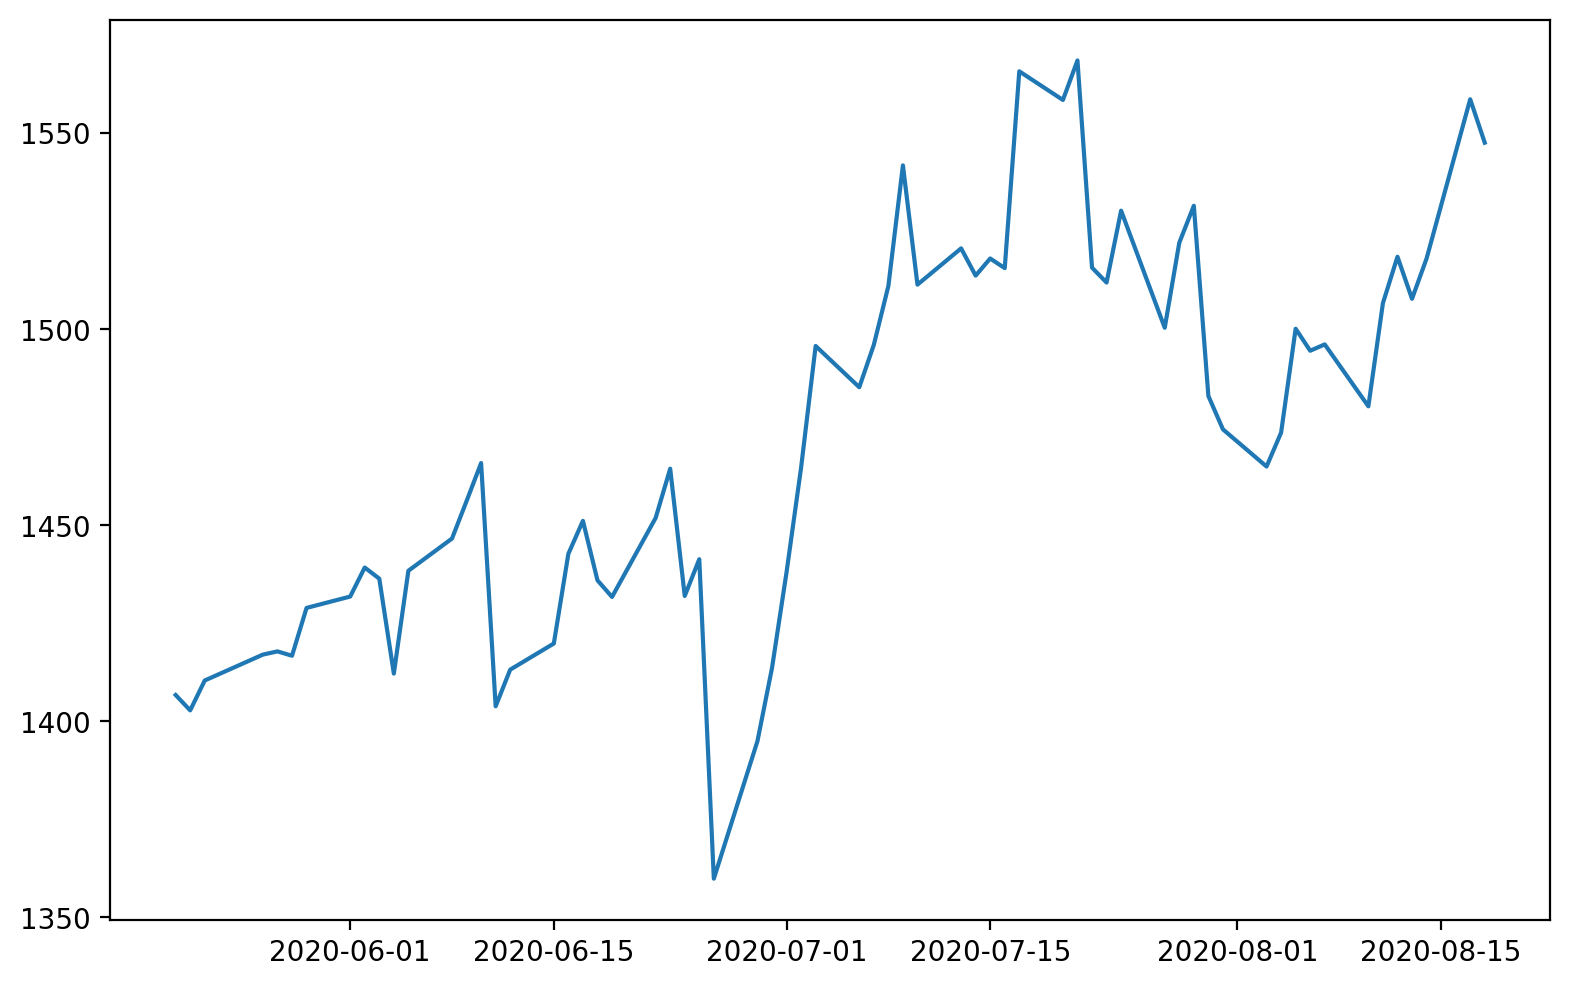

In [45]:
import datetime

# I'll show other ways of doing this when I cover Matplotlib Finance
# Get Yahoo GOOG csv file and convert to NumPy array
# https://finance.yahoo.com/quote/GOOG/history/
goog_data = pd.read_csv('GOOG.csv')
goog_data_np = goog_data.to_numpy()
# Get array of prices in 5th column
goog_cp = goog_data_np[:,4]
goog_cp

# Get NumPy array with just weekdays between dates excluding holidays
holidays = [datetime.datetime(2020,5,25), datetime.datetime(2020,8,19)]
date_arr = pd.bdate_range(start='5/20/2020', end='8/19/2020', 
                          freq='C',
                         holidays=holidays)
date_arr_np = date_arr.to_numpy()

fig_7 = plt.figure(figsize=(8,5),dpi=100)
axes_7 = fig_7.add_axes([0.1,0.1,0.9,0.9])
plt.plot(date_arr_np, goog_cp)

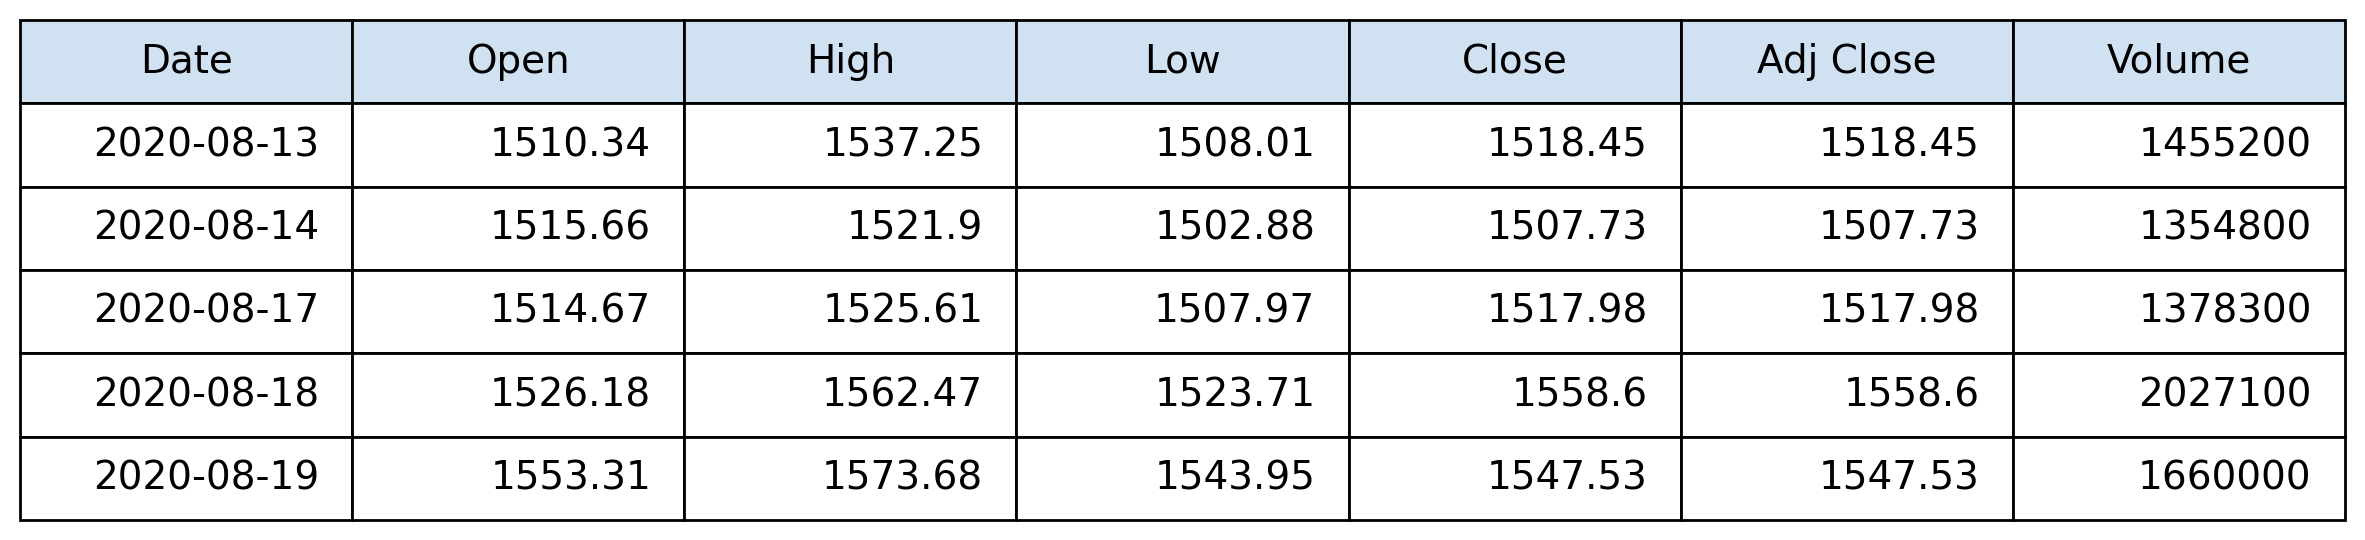

In [47]:
# Format column data to 2 decimals
goog_data['Open'] = pd.Series([round(val, 2) for val in goog_data['Open']], 
                              index = goog_data.index)
goog_data['High'] = pd.Series([round(val, 2) for val in goog_data['High']], 
                              index = goog_data.index)
goog_data['Low'] = pd.Series([round(val, 2) for val in goog_data['Low']], 
                              index = goog_data.index)
goog_data['Close'] = pd.Series([round(val, 2) for val in goog_data['Close']], 
                              index = goog_data.index)
goog_data['Adj Close'] = pd.Series([round(val, 2) for val in goog_data['Adj Close']], 
                              index = goog_data.index)

# Get most recent last 5 days of stock data
stk_data = goog_data[-5:]
stk_data

# Define headers
col_head = ('Date','Open','High','Low','Close','Adj Close','Volume')

stk_data_np = stk_data.to_numpy()
stk_data_np

# Add padding around cells in table
plt.figure(linewidth=2, figsize=(5,3))

# Get rid of axes and plot box
axes_8 = plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on=None)

# np.full returns an array filled with 0.1
# cm is a colormap object we are using to use a default blue color
# matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ccolors = plt.cm.Blues(np.full(len(col_head), 0.2))

# Receives data, loc, list of column headers, column header color as array of colors
# You can also add rowLabel, rowColours, rowLoc: Text alignment
the_table = plt.table(cellText=stk_data_np, loc='center', colLabels=col_head,
                     colColours=ccolors)
# Set table font size
the_table.set_fontsize(14)
the_table.scale(3, 2.5)

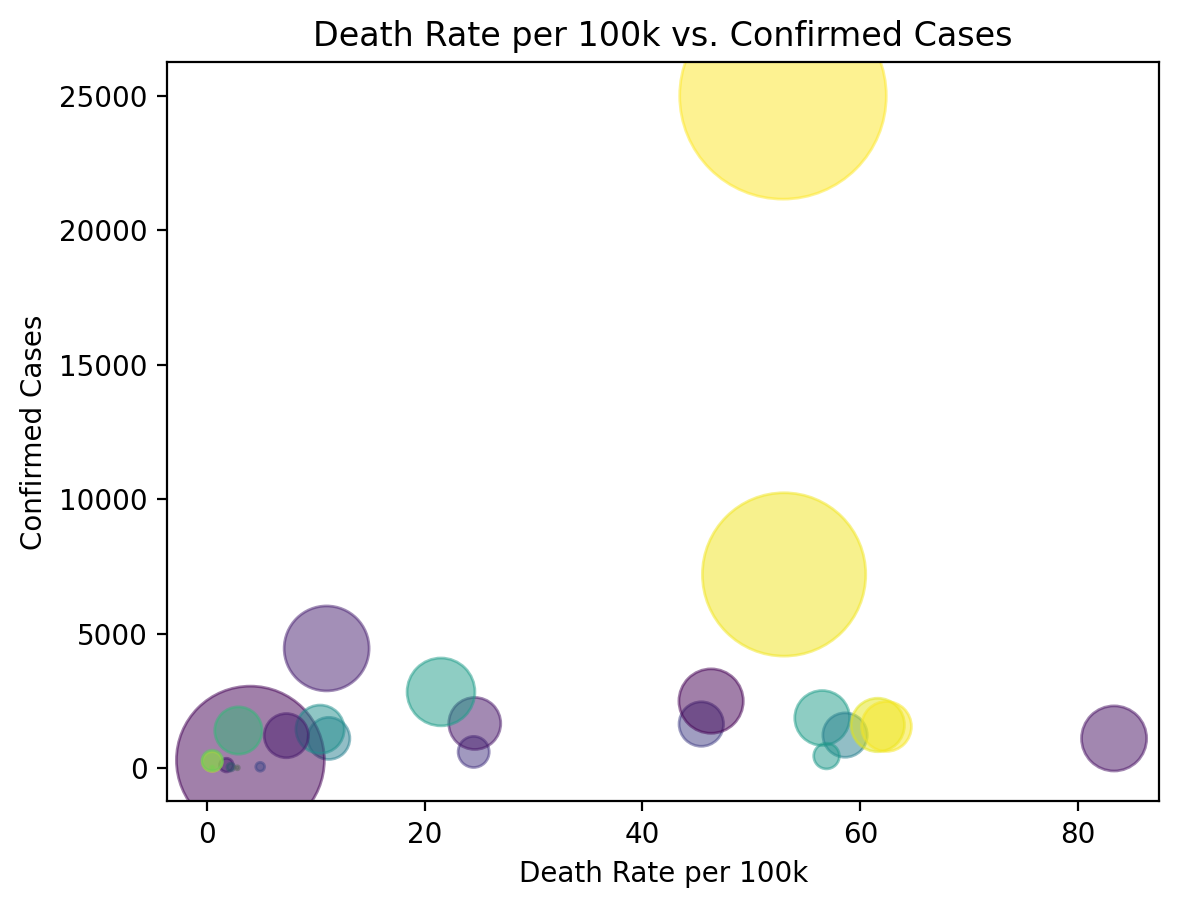

In [48]:
# Country array
cnt_arr = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])
# Death rate per 100k Coronavirus
dr_arr = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])
# Daily confirmed cases (Tests)
test_arr = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])
# Dot size Confirmed cases
cc_arr = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])
cc_arr_sm = cc_arr / 1000
color_arr = np.random.rand(26)

plt.title('Death Rate per 100k vs. Confirmed Cases')
plt.xlabel('Death Rate per 100k')
plt.ylabel('Confirmed Cases')
plt.scatter(dr_arr,test_arr,s=cc_arr_sm,c=color_arr,alpha=0.5)

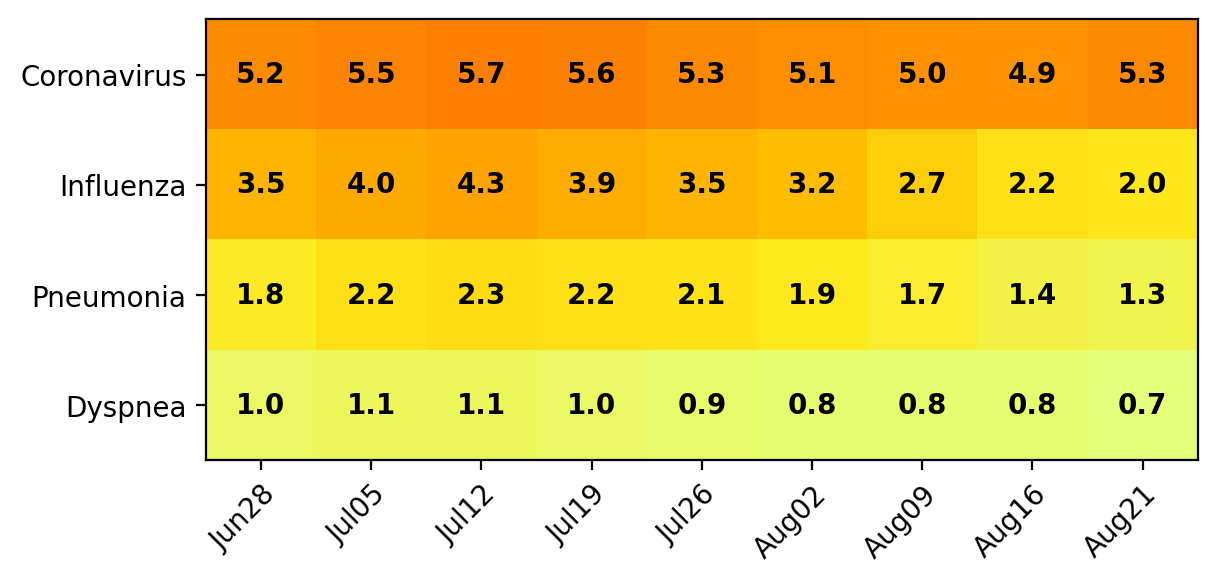

In [49]:
# A heatmap is a color coded representation of data from a 2D list
symptoms = ["Coronavirus","Influenza","Pneumonia","Dyspnea"]
dates = ["Jun28","Jul05","Jul12","Jul19","Jul26","Aug02","Aug09","Aug16","Aug21"]
symp_per = np.array([[5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
                    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
                    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
                    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]])

fig_10, axes_10 = plt.subplots()
# Dfine data to use and color map
im = axes_10.imshow(symp_per, cmap="Wistia")

# Add ticks at data points and labels
axes_10.set_xticks(np.arange(len(dates)))
axes_10.set_yticks(np.arange(len(symptoms)))
axes_10.set_xticklabels(dates)
axes_10.set_yticklabels(symptoms)

# Rotate labels on the bottom so they don't overlap
plt.setp(axes_10.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(symptoms)):
    for j in range(len(dates)):
        text = axes_10.text(j, i, symp_per[i, j],
                       ha="center", va="center", color="k",fontweight="bold")
        

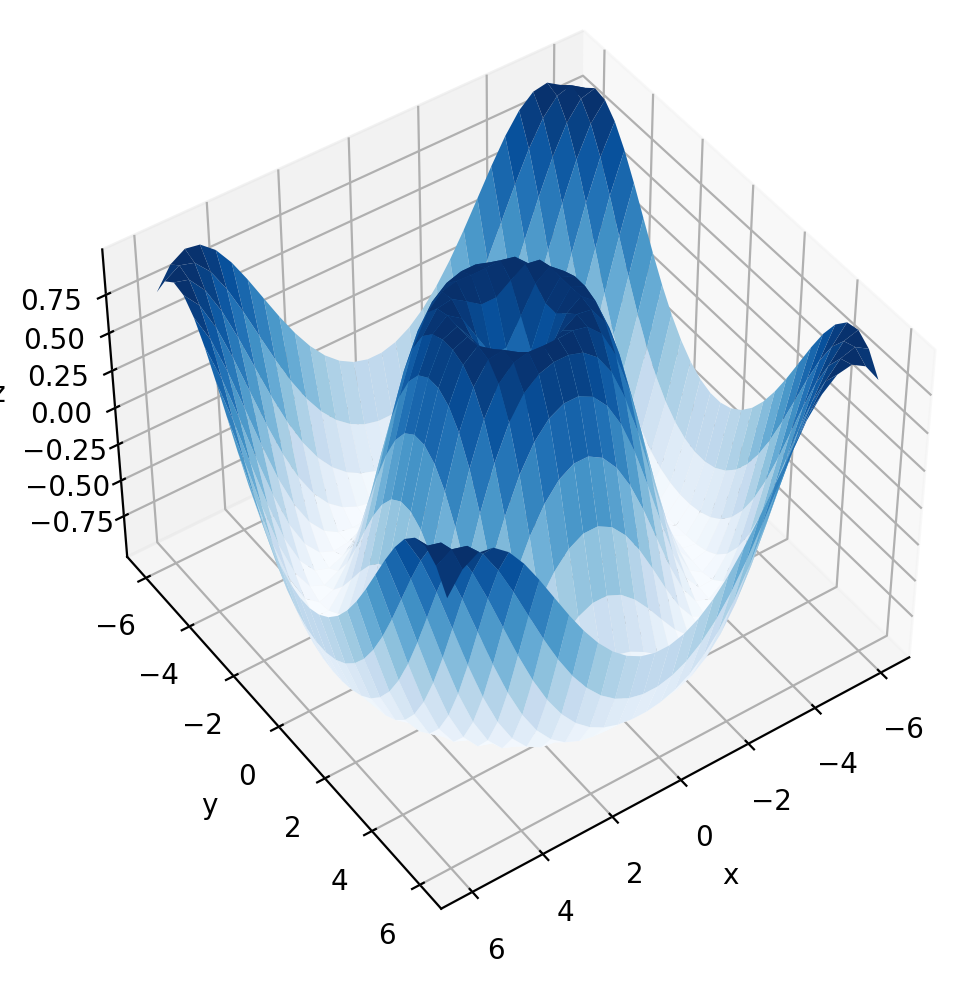

In [50]:
# Needed for creating 3D axes
from mpl_toolkits import mplot3d

fig_9 = plt.figure(figsize=(8,5),dpi=100)
axes_9 = fig_9.add_axes([0.1,0.1,0.9,0.9], projection='3d')

# Create a 3D scatterplot
# Te darker points are represented that way to seem closer to you
z_3 = 15 * np.random.random(100)
x_3 = np.sin(z_3) * np.random.randn(100)
y_3 = np.cos(z_3) * np.random.randn(100)
# axes_9.scatter3D(x_3, y_3, z_3, c=z_3, cmap='Blues')

# You can create contour plots by defining a function for z based on x & y
def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x_4 = np.linspace(-6, 6, 30)
y_4 = np.linspace(-6, 6, 30)

# Creates a rectangular grid out of 2 given 1D arrays
x_4, y_4 = np.meshgrid(x_4, y_4)
z_4 = get_z(x_4,y_4)

# Change viewing angle to reorient camera 60 degrees and rotate 55
axes_9.view_init(45,55)

# Provide x, y, z, contours and color map
# axes_9.contour3D(x_4,y_4,z_4,80,cmap='Blues')
axes_9.set_xlabel('x')
axes_9.set_ylabel('y')
axes_9.set_zlabel('z')

# You can create wireframes
# axes_9.plot_wireframe(x_4,y_4,z_4,color='blue')

# You can create surface plots which is wireframe with filled faces
axes_9.plot_surface(x_4,y_4,z_4, rstride=1, cstride=1,cmap='Blues',edgecolor='none')